**Business Objective:**
Develop a predictive model to categorize individuals into distinct health conditions, specifically identifying whether they have no disease, suspect disease, hepatitis C, fibrosis, or cirrhosis based on relevant input data. This model aims to enhance diagnostic processes and assist healthcare professionals in making timely and accurate assessments of patients' health status.

# Importing the libraries

In [1]:
import pandas as pd
import itertools 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
liver_data = pd.read_csv('project-data (1).csv')
liver_data

category  age sex  albumin  alkaline_phosphatase  \
0     no_disease   32   m     38.5                  52.5   
1     no_disease   32   m     38.5                  70.3   
2     no_disease   32   m     46.9                  74.7   
3     no_disease   32   m     43.2                  52.0   
4     no_disease   32   m     39.2                  74.1   
..           ...  ...  ..      ...                   ...   
610    cirrhosis   62   f     32.0                 416.6   
611    cirrhosis   64   f     24.0                 102.8   
612    cirrhosis   64   f     29.0                  87.3   
613    cirrhosis   46   f     33.0                   NaN   
614    cirrhosis   59   f     36.0                   NaN   

     alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                         7.7                        22.1        7.5   
1                        18.0                        24.7        3.9   
2                        36.2                        52.6        6.1   
3                        30.6                        22.6       18.9   
4                        32.6                        24.8        9.6   
..                        ...                         ...        ...   
610                       5.9                       110.3       50.0   
611                       2.9                        44.4       20.0   
612                       3.5                        99.0       48.0   
613                      39.0                        62.0       20.0   
614                     100.0                        80.0       12.0   

     cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase   \
0              6.93         3.23       106.0                         12.1   
1             11.17         4.80        74.0                         15.6   
2              8.84         5.20        86.0                         33.2   
3              7.33         4.74        80.0                         33.8   
4              9.15         4.32        76.0                         29.9   
..              ...          ...         ...                          ...   
610            5.57         6.30        55.7                        650.9   
611            1.54         3.02        63.0                         35.9   
612            1.66         3.63        66.7                         64.2   
613            3.56         4.20        52.0                         50.0   
614            9.07         5.30        67.0                         34.0   

    protein     
0           69  
1         76.5  
2         79.3  
3         75.7  
4         68.7  
..         ...  
610       68.5  
611       71.3  
612         82  
613         71  
614         68  

[615 rows x 13 columns]

# EDA

In [3]:
liver_data.shape

(615, 13)

In [4]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [5]:
# Rename the column by stripping extra spaces
liver_data.rename(columns={'protein   ': 'protein'}, inplace=True)

# Convert 'protein' column to numeric type
liver_data['protein'] = pd.to_numeric(liver_data['protein'], errors='coerce')

##### liver_data['protein'] = pd.to_numeric(liver_data['protein'], errors='coerce')

In [6]:
liver_data['sex'] = liver_data['sex'].astype('category')

In [7]:
# Display column names to verify 'protein' column existence
print(liver_data.columns)

# View the DataFrame to inspect its structure
print(liver_data.head())

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein'],
      dtype='object')
      category  age sex  albumin  alkaline_phosphatase  \
0   no_disease   32   m     38.5                  52.5   
1   no_disease   32   m     38.5                  70.3   
2   no_disease   32   m     46.9                  74.7   
3   no_disease   32   m     43.2                  52.0   
4   no_disease   32   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7                        22.1        7.5   
1                      18.0                        24.7        3.9   
2                      36.2                        52.6        6.1   
3                      30.6                        22.6       18.9   
4                      32.6  

In [8]:
liver_data.describe()

age     albumin  alkaline_phosphatase  alanine_aminotransferase  \
count  615.000000  614.000000            597.000000                614.000000   
mean    47.408130   41.620195             68.283920                 28.450814   
std     10.055105    5.780629             26.028315                 25.469689   
min     19.000000   14.900000             11.300000                  0.900000   
25%     39.000000   38.800000             52.500000                 16.400000   
50%     47.000000   41.950000             66.200000                 23.000000   
75%     54.000000   45.200000             80.100000                 33.075000   
max     77.000000   82.200000            416.600000                325.300000   

       aspartate_aminotransferase   bilirubin  cholinesterase  cholesterol  \
count                  615.000000  615.000000      615.000000   605.000000   
mean                    34.786341   11.396748        8.196634     5.368099   
std                     33.090690   19.673150        2.205657     1.132728   
min                     10.600000    0.800000        1.420000     1.430000   
25%                     21.600000    5.300000        6.935000     4.610000   
50%                     25.900000    7.300000        8.260000     5.300000   
75%                     32.900000   11.200000        9.590000     6.060000   
max                    324.000000  254.000000       16.410000     9.670000   

        creatinina  gamma_glutamyl_transferase      protein  
count   615.000000                   615.000000  614.000000  
mean     81.287805                    39.533171   72.044137  
std      49.756166                    54.661071    5.402636  
min       8.000000                     4.500000   44.800000  
25%      67.000000                    15.700000   69.300000  
50%      77.000000                    23.300000   72.200000  
75%      88.000000                    40.200000   75.400000  
max    1079.100000                   650.900000   90.000000

In [9]:
liver_data.isna().sum()

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         1
dtype: int64

In [10]:
liver_data.select_dtypes(include=(['int64', 'float64'])).isna().sum()

age                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         1
dtype: int64

In [11]:
liver_data.select_dtypes(include=(['int64', 'float64'])).isna().sum()
liver_data_num_col = liver_data.select_dtypes(include=(['int64', 'float64'])).columns
for c in liver_data_num_col:
    liver_data[c].fillna(liver_data[c].median(), inplace=True)

liver_data.select_dtypes(include=(['int64', 'float64'])).isna().sum()

age                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

In [12]:
liver_data.select_dtypes(include=('object')).isna().sum()

category    0
dtype: int64

In [13]:
liver_data.dtypes

category                         object
age                               int64
sex                            category
albumin                         float64
alkaline_phosphatase            float64
alanine_aminotransferase        float64
aspartate_aminotransferase      float64
bilirubin                       float64
cholinesterase                  float64
cholesterol                     float64
creatinina                      float64
gamma_glutamyl_transferase      float64
protein                         float64
dtype: object

In [14]:

liver_data['sex'].value_counts()

m    377
f    238
Name: sex, dtype: int64

# Graphical Representation 

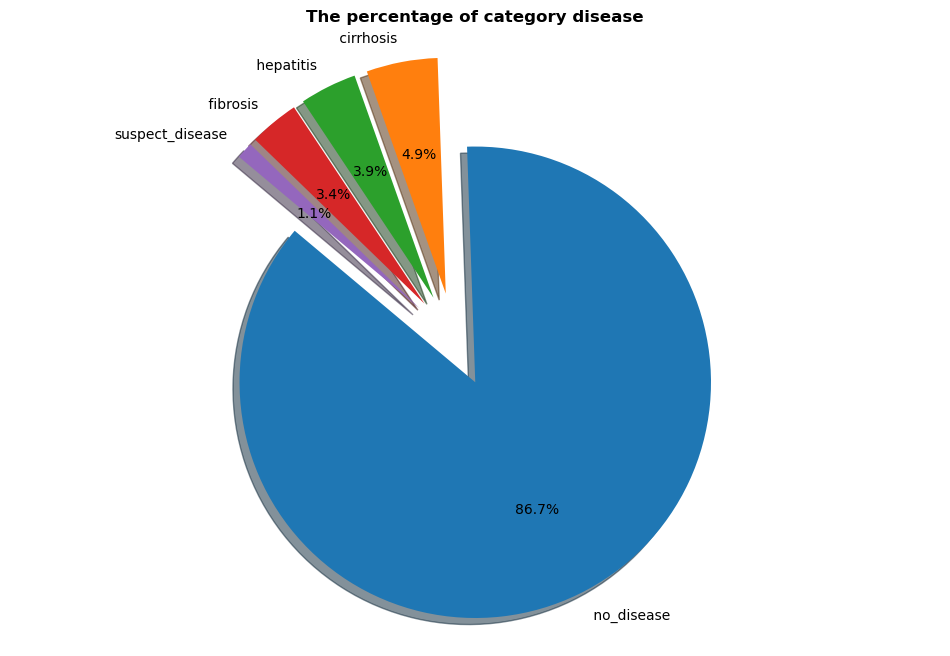

In [15]:
plt.figure(figsize = (12,8))
names = liver_data['category'].value_counts()[:6].index
values = liver_data['category'].value_counts()[:6].values
explode = (0.2,0.2,0.2,0.2,0.2)  # explode 1st slice

plt.title('The percentage of category disease', weight = 'bold')
plt.pie(values, labels=names,explode=explode,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

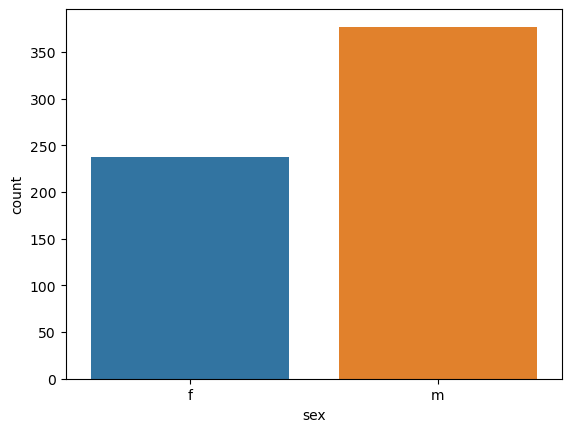

In [16]:
sns.countplot(liver_data, x="sex")

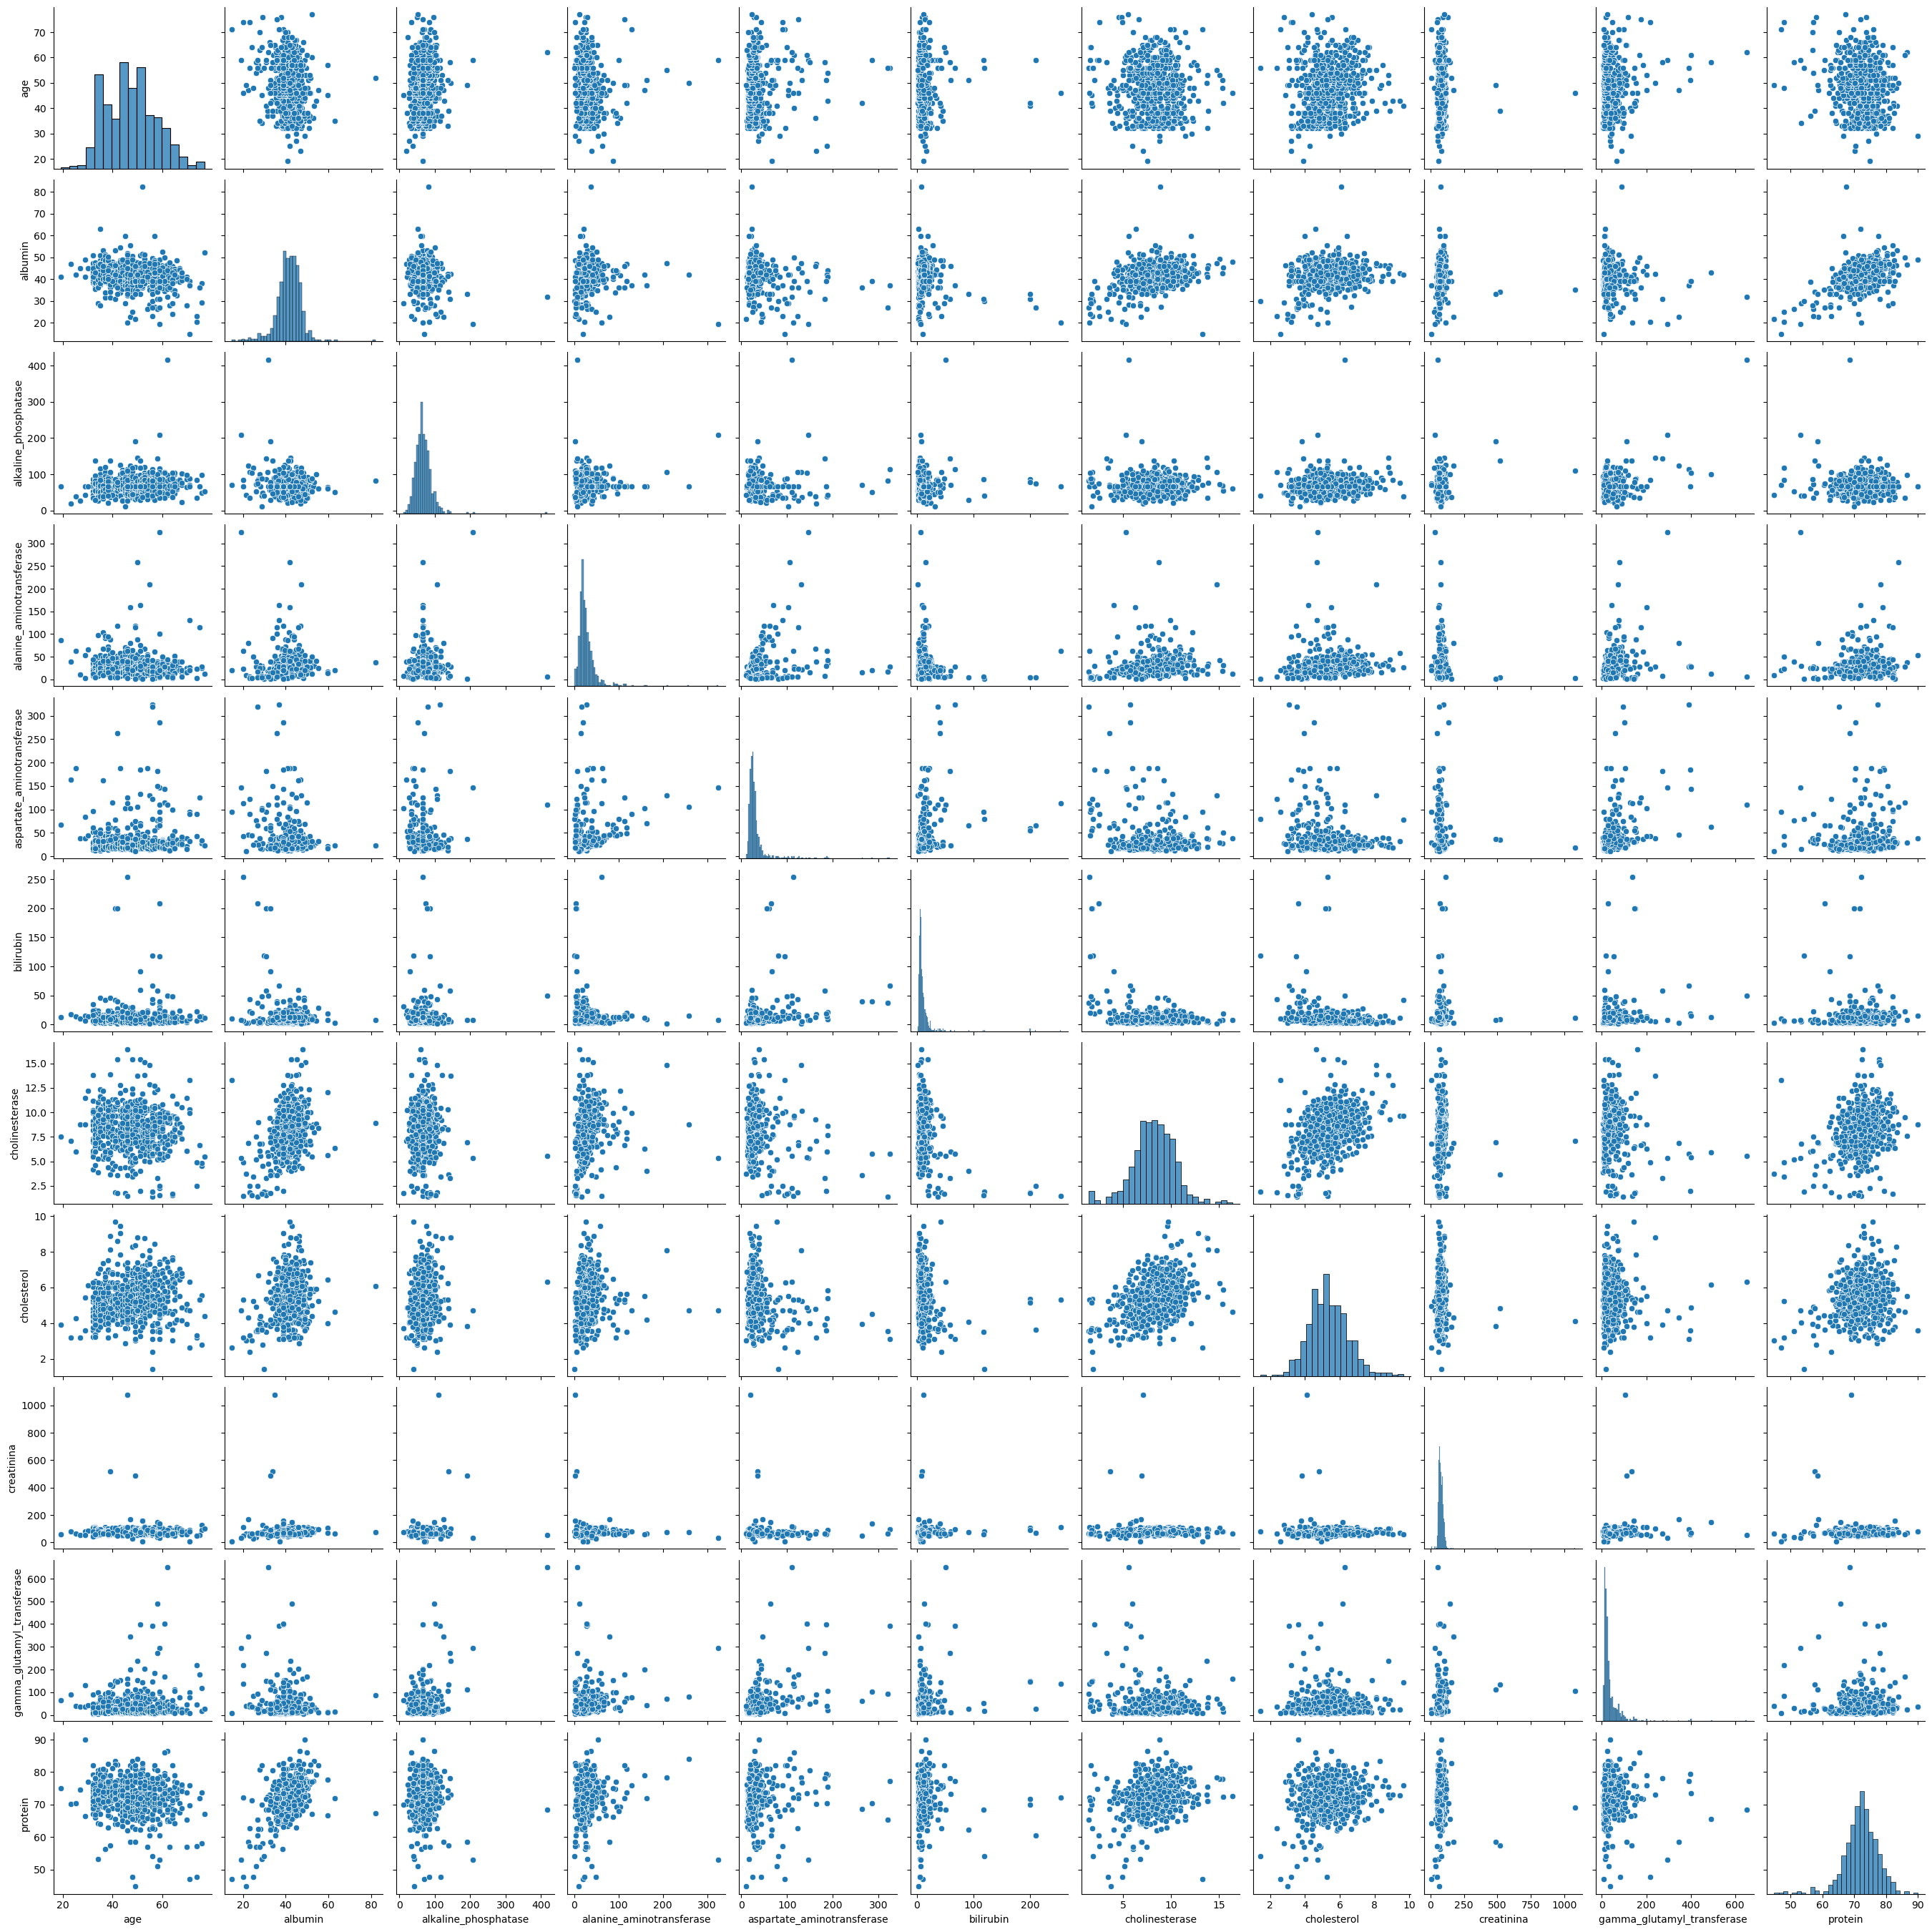

In [17]:
sns.pairplot(liver_data)

<Axes: xlabel='age', ylabel='Count'>

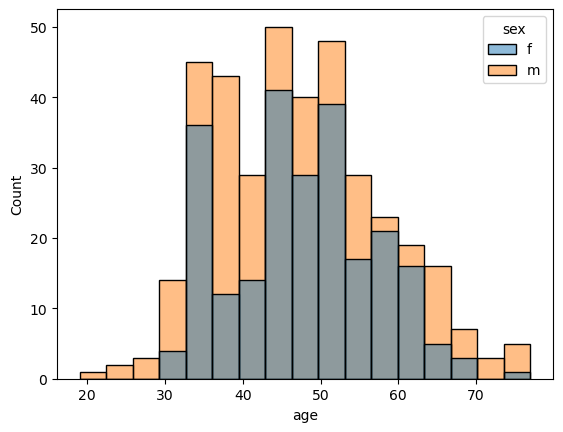

In [18]:
sns.histplot(data=liver_data, x='age', hue='sex')

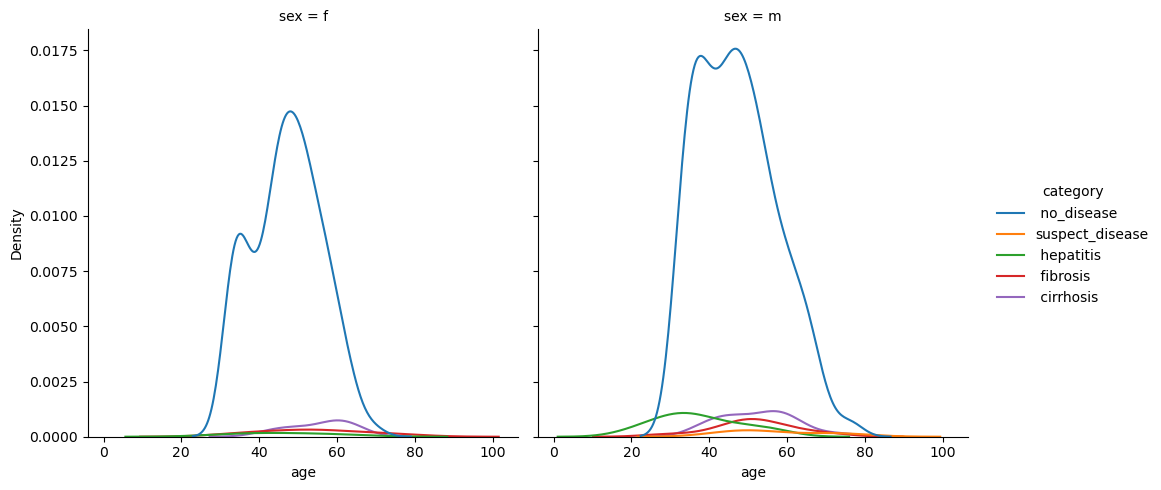

In [19]:
fig, figsize=(16,8)
sns.displot(data=liver_data, x='age', hue='category', col='sex', kind ='kde')

<Axes: xlabel='category', ylabel='protein'>

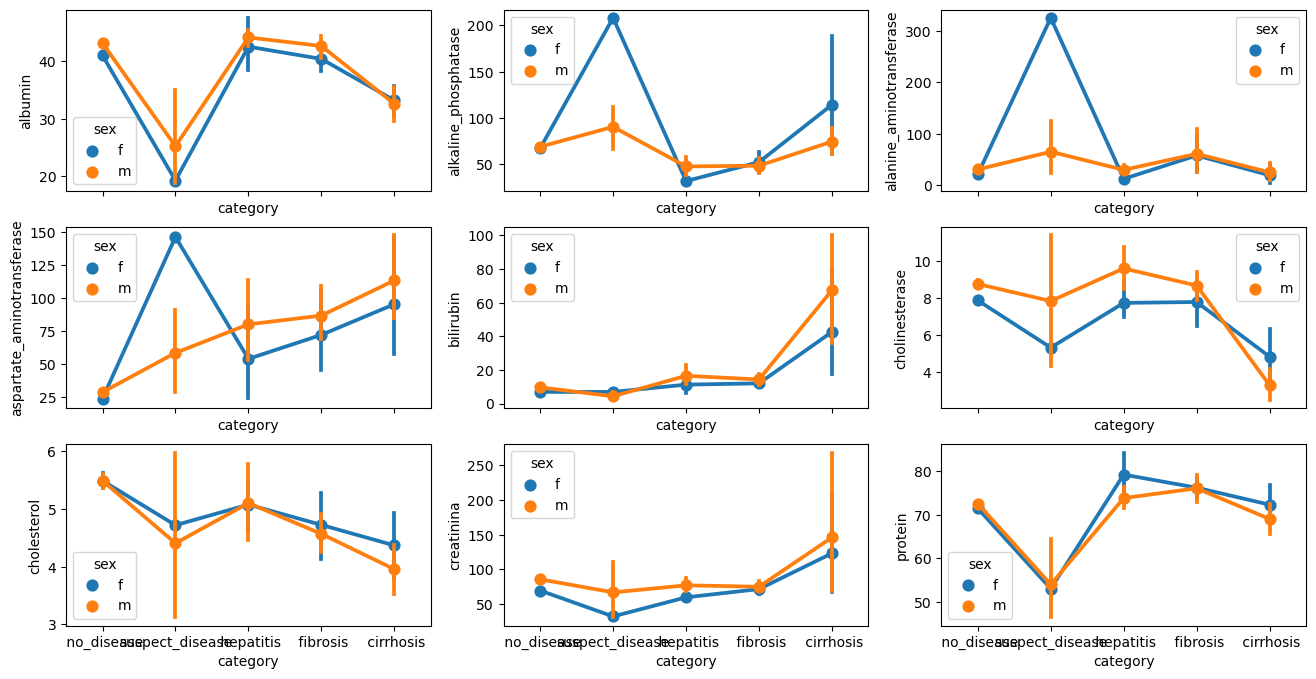

In [20]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
sns.pointplot(ax=axes[0, 0],data=liver_data, x='category', y='albumin', hue='sex')
sns.pointplot(ax=axes[0, 1],data=liver_data, x='category', y='alkaline_phosphatase', hue='sex')
sns.pointplot(ax=axes[0, 2],data=liver_data, x='category', y='alanine_aminotransferase', hue='sex')
sns.pointplot(ax=axes[1, 0],data=liver_data, x='category', y='aspartate_aminotransferase', hue='sex')
sns.pointplot(ax=axes[1, 1],data=liver_data, x='category', y='bilirubin', hue='sex')
sns.pointplot(ax=axes[1, 2],data=liver_data, x='category', y='cholinesterase', hue='sex')
sns.pointplot(ax=axes[2, 0],data=liver_data, x='category', y='cholesterol', hue='sex')
sns.pointplot(ax=axes[2, 1],data=liver_data, x='category', y='creatinina', hue='sex')
sns.pointplot(ax=axes[2, 2],data=liver_data, x='category', y='protein', hue='sex')



<Axes: ylabel='protein'>

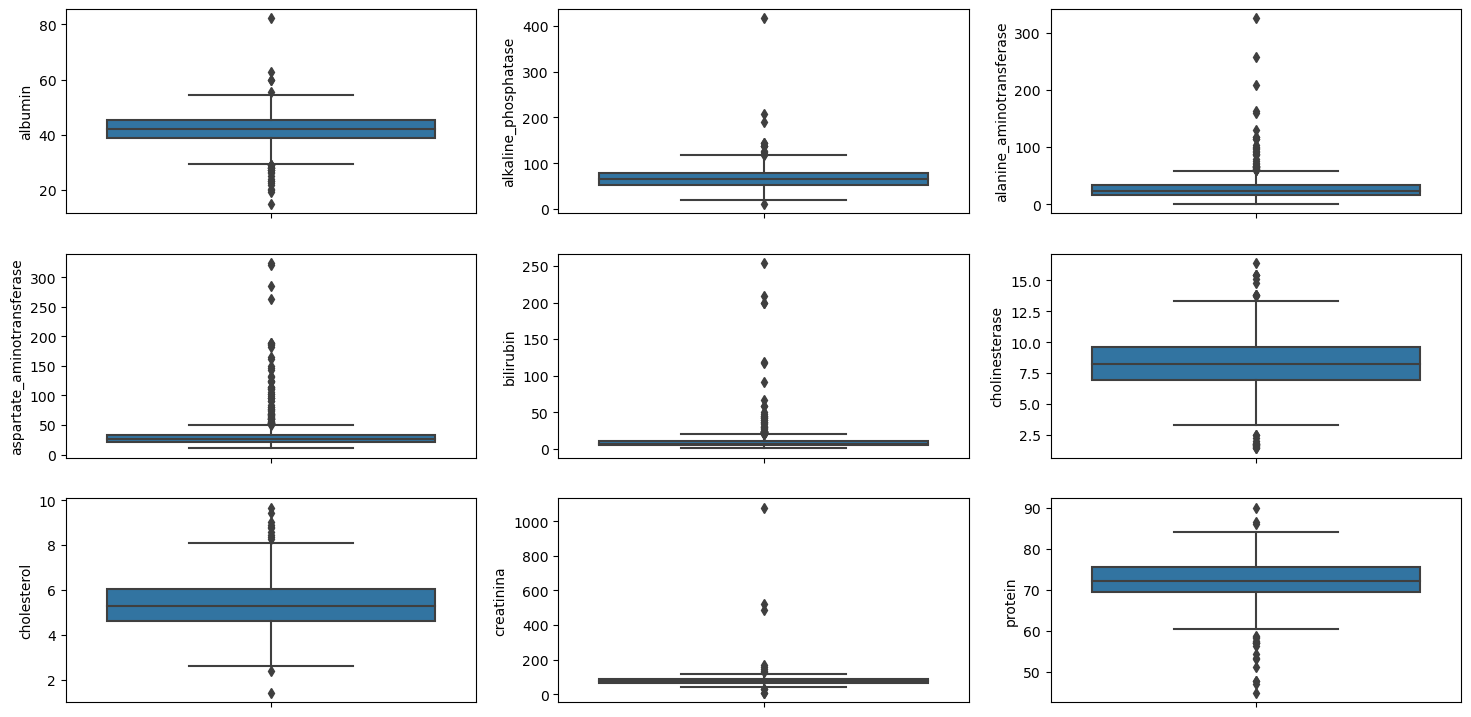

In [21]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(18,9))
sns.boxplot(ax=axes[0, 0],data=liver_data,y='albumin',  orient ='h')
sns.boxplot(ax=axes[0, 1],data=liver_data, y='alkaline_phosphatase', orient='h')
sns.boxplot(ax=axes[0, 2],data=liver_data, y='alanine_aminotransferase', orient='h')
sns.boxplot(ax=axes[1, 0],data=liver_data, y='aspartate_aminotransferase',orient='h')
sns.boxplot(ax=axes[1, 1],data=liver_data,  y='bilirubin',orient='h')
sns.boxplot(ax=axes[1, 2],data=liver_data,  y='cholinesterase',orient='h')
sns.boxplot(ax=axes[2, 0],data=liver_data,  y='cholesterol', orient='h')
sns.boxplot(ax=axes[2, 1],data=liver_data,  y='creatinina', orient='h')
sns.boxplot(ax=axes[2, 2],data=liver_data,  y='protein', orient='h')



In [22]:
numerical_summary = liver_data.describe()
print("Statistical Summary for Numerical Features:")
print(numerical_summary)

Statistical Summary for Numerical Features:
              age     albumin  alkaline_phosphatase  alanine_aminotransferase  \
count  615.000000  615.000000            615.000000                615.000000   
mean    47.408130   41.620732             68.222927                 28.441951   
std     10.055105    5.775935             25.646364                 25.449889   
min     19.000000   14.900000             11.300000                  0.900000   
25%     39.000000   38.800000             52.950000                 16.400000   
50%     47.000000   41.950000             66.200000                 23.000000   
75%     54.000000   45.200000             79.300000                 33.050000   
max     77.000000   82.200000            416.600000                325.300000   

       aspartate_aminotransferase   bilirubin  cholinesterase  cholesterol  \
count                  615.000000  615.000000      615.000000   615.000000   
mean                    34.786341   11.396748        8.196634     5.36

In [23]:
numerical_cols = liver_data.select_dtypes(include=['number']).columns

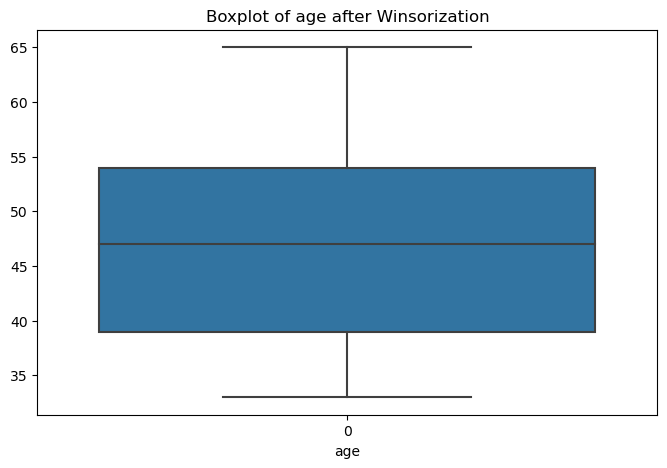

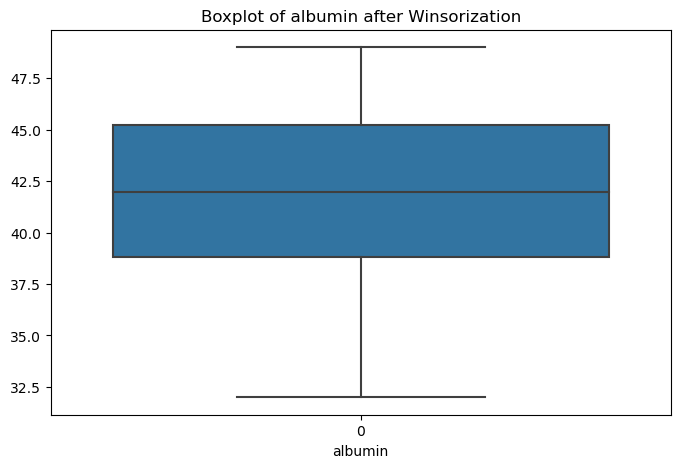

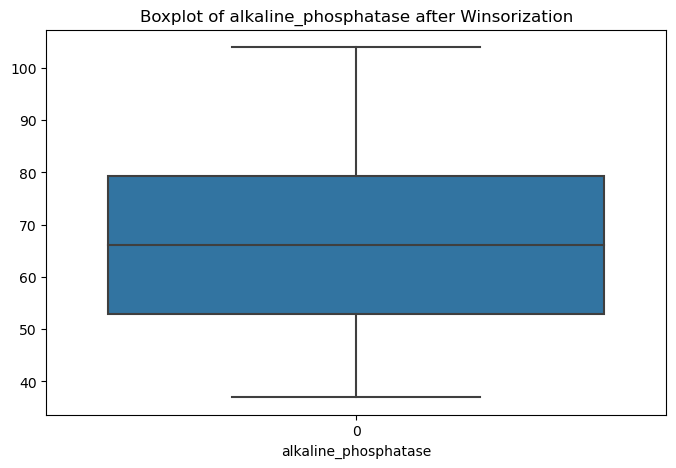

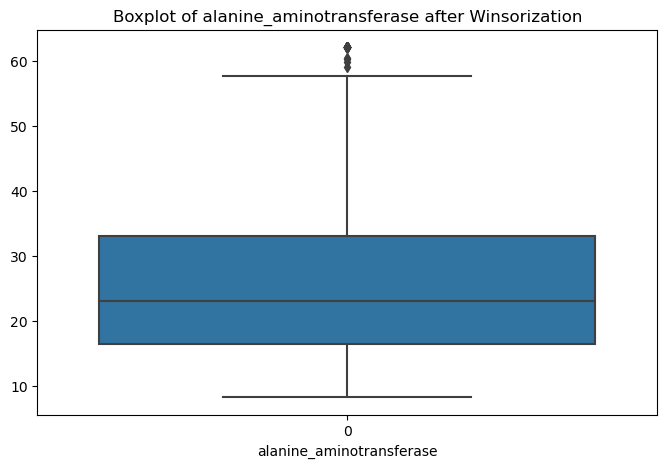

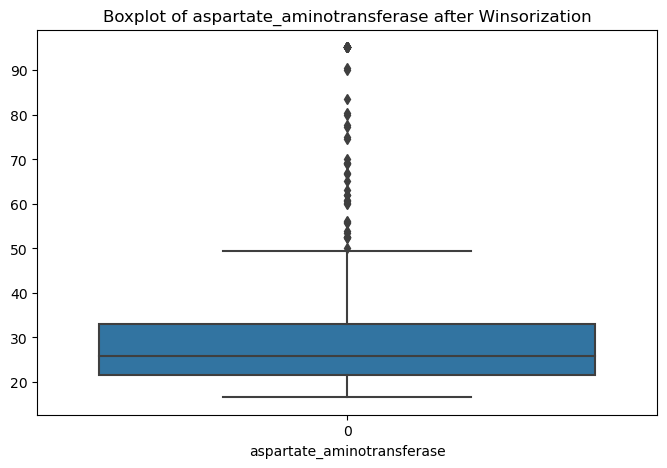

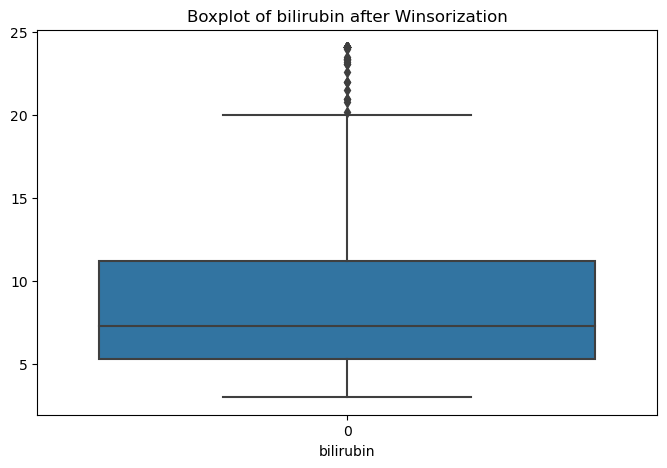

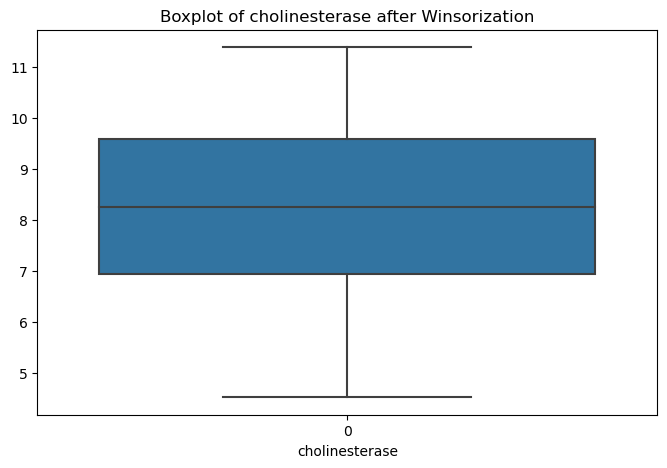

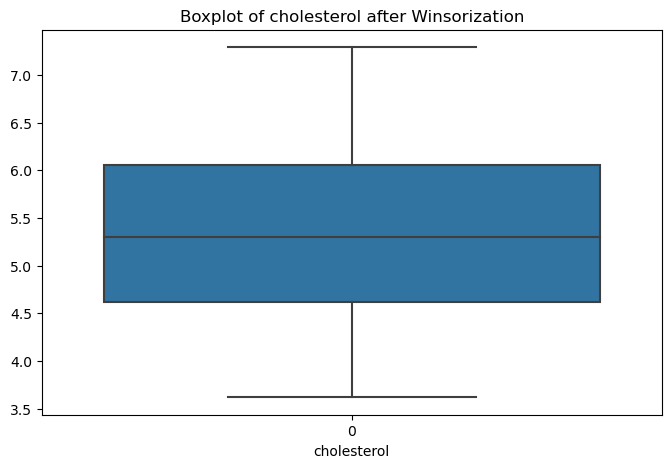

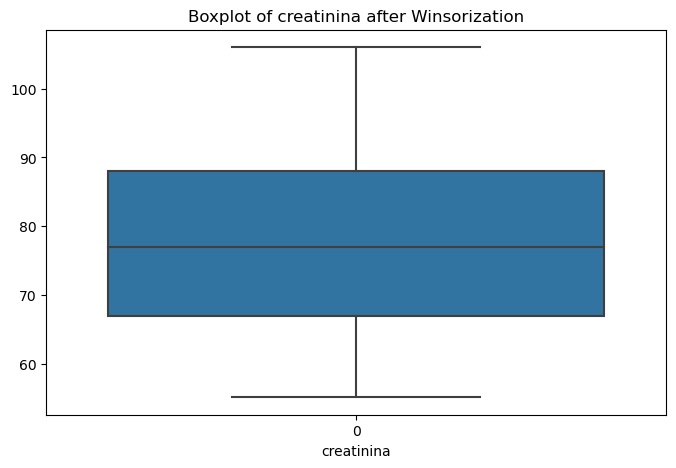

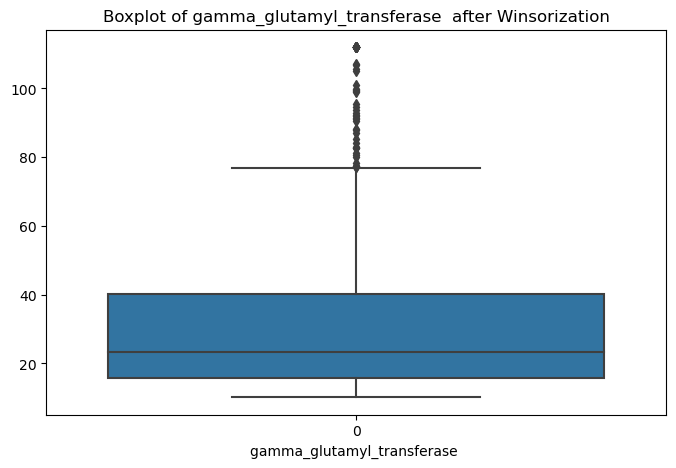

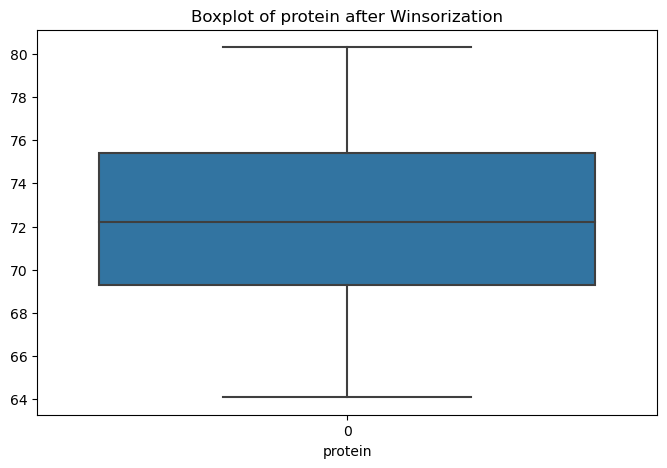

In [24]:
from scipy.stats.mstats import winsorize

# Applying winsorization to cap outliers at 5th and 95th percentiles
for col in numerical_cols:
    liver_data[col] = winsorize(liver_data[col], limits=[0.05, 0.05])

# Visualize boxplots after Winsorization
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(liver_data[col])
    plt.title(f'Boxplot of {col} after Winsorization')
    plt.xlabel(col)
    plt.show()

<Axes: xlabel='age', ylabel='protein'>

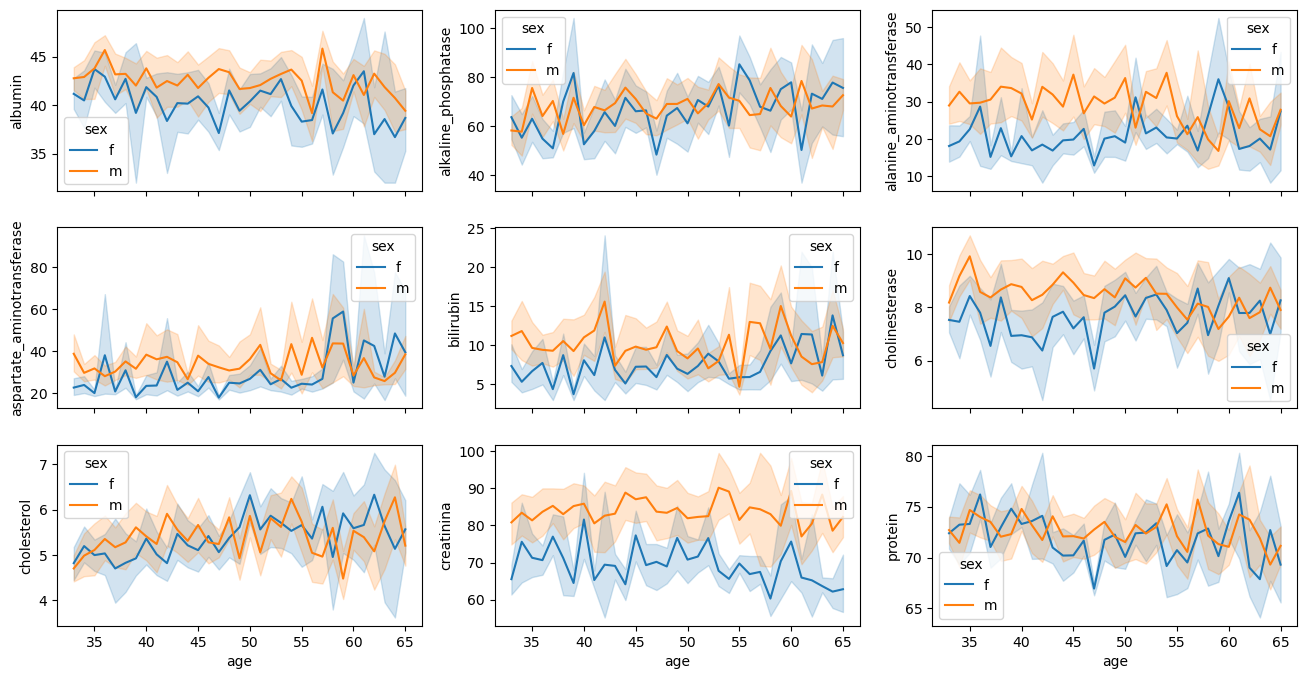

In [25]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
sns.lineplot(ax=axes[0, 0],data=liver_data, x='age', y='albumin', hue='sex')
sns.lineplot(ax=axes[0, 1],data=liver_data, x='age', y='alkaline_phosphatase', hue='sex')
sns.lineplot(ax=axes[0, 2],data=liver_data, x='age', y='alanine_aminotransferase', hue='sex')
sns.lineplot(ax=axes[1, 0],data=liver_data, x='age', y='aspartate_aminotransferase', hue='sex')
sns.lineplot(ax=axes[1, 1],data=liver_data, x='age', y='bilirubin', hue='sex')
sns.lineplot(ax=axes[1, 2],data=liver_data, x='age', y='cholinesterase', hue='sex')
sns.lineplot(ax=axes[2, 0],data=liver_data, x='age', y='cholesterol', hue='sex')
sns.lineplot(ax=axes[2, 1],data=liver_data, x='age', y='creatinina', hue='sex')
sns.lineplot(ax=axes[2, 2],data=liver_data, x='age', y='protein', hue='sex')



<Axes: xlabel='age', ylabel='protein'>

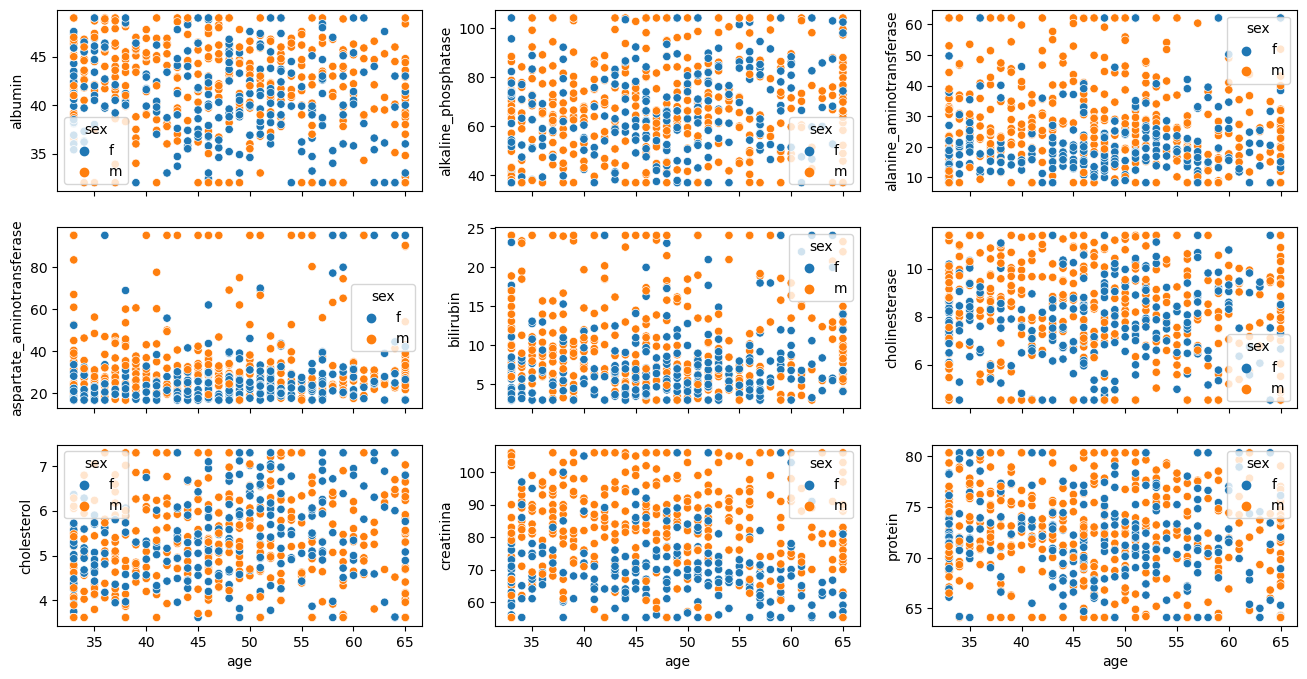

In [26]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
sns.scatterplot(ax=axes[0, 0],data=liver_data, x='age', y='albumin', hue='sex')
sns.scatterplot(ax=axes[0, 1],data=liver_data, x='age', y='alkaline_phosphatase', hue='sex')
sns.scatterplot(ax=axes[0, 2],data=liver_data, x='age', y='alanine_aminotransferase', hue='sex')
sns.scatterplot(ax=axes[1, 0],data=liver_data, x='age', y='aspartate_aminotransferase', hue='sex')
sns.scatterplot(ax=axes[1, 1],data=liver_data, x='age', y='bilirubin', hue='sex')
sns.scatterplot(ax=axes[1, 2],data=liver_data, x='age', y='cholinesterase', hue='sex')
sns.scatterplot(ax=axes[2, 0],data=liver_data, x='age', y='cholesterol', hue='sex')
sns.scatterplot(ax=axes[2, 1],data=liver_data, x='age', y='creatinina', hue='sex')
sns.scatterplot(ax=axes[2, 2],data=liver_data, x='age', y='protein', hue='sex')



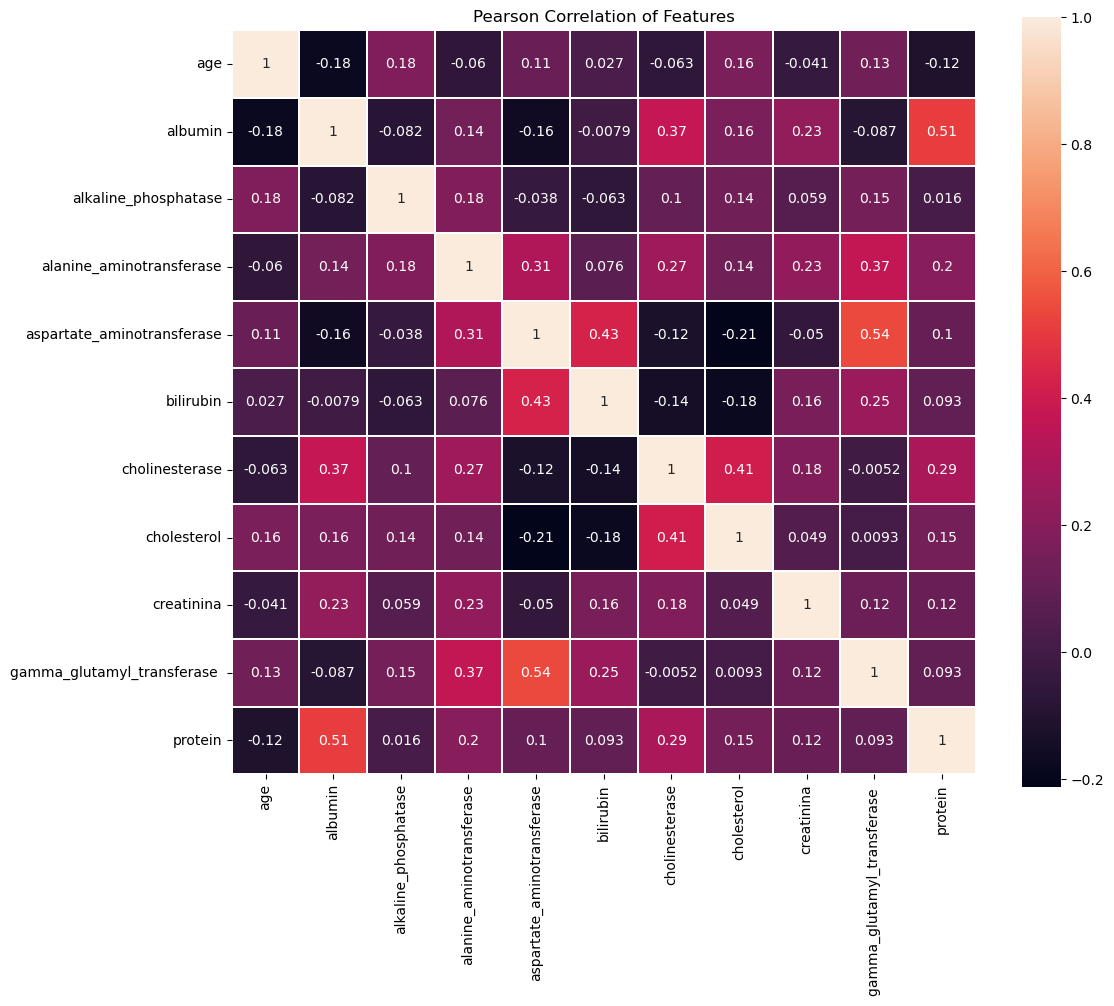

In [27]:
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(liver_data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.show()

# Auto EDA

In [28]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [29]:
import dtale
import pandas as pd

In [30]:
dtale.show(liver_data)

In [31]:
pip install pandas_profiling

  Obtaining dependency information for joblib~=1.1.0 from https://files.pythonhosted.org/packages/7c/91/d3ba0401e62d7e42816bc7d97b82d19c95c164b3e149a87c0a1c026a735e/joblib-1.1.1-py2.py3-none-any.whl.metadata
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.


In [32]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [33]:
import sweetviz as sv

In [34]:
report = sv.analyze(liver_data)

                                             |          | [  0%]   00:00 -> (? left)


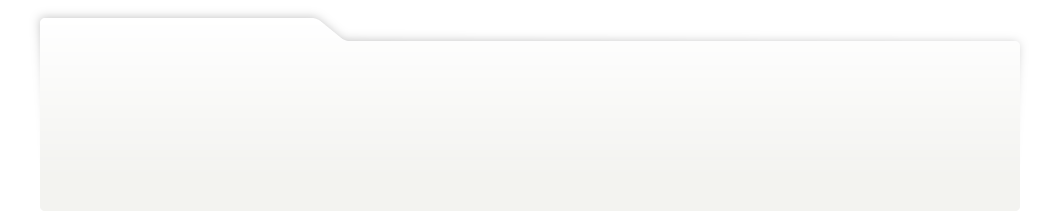
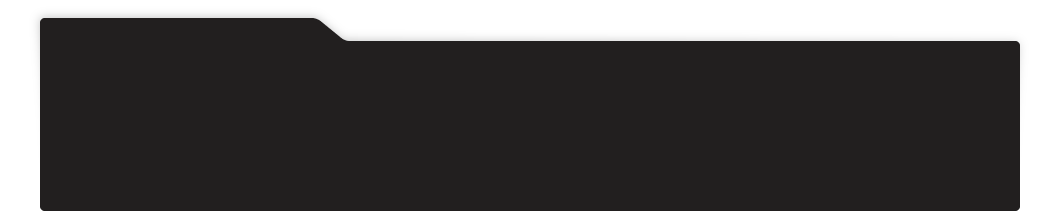
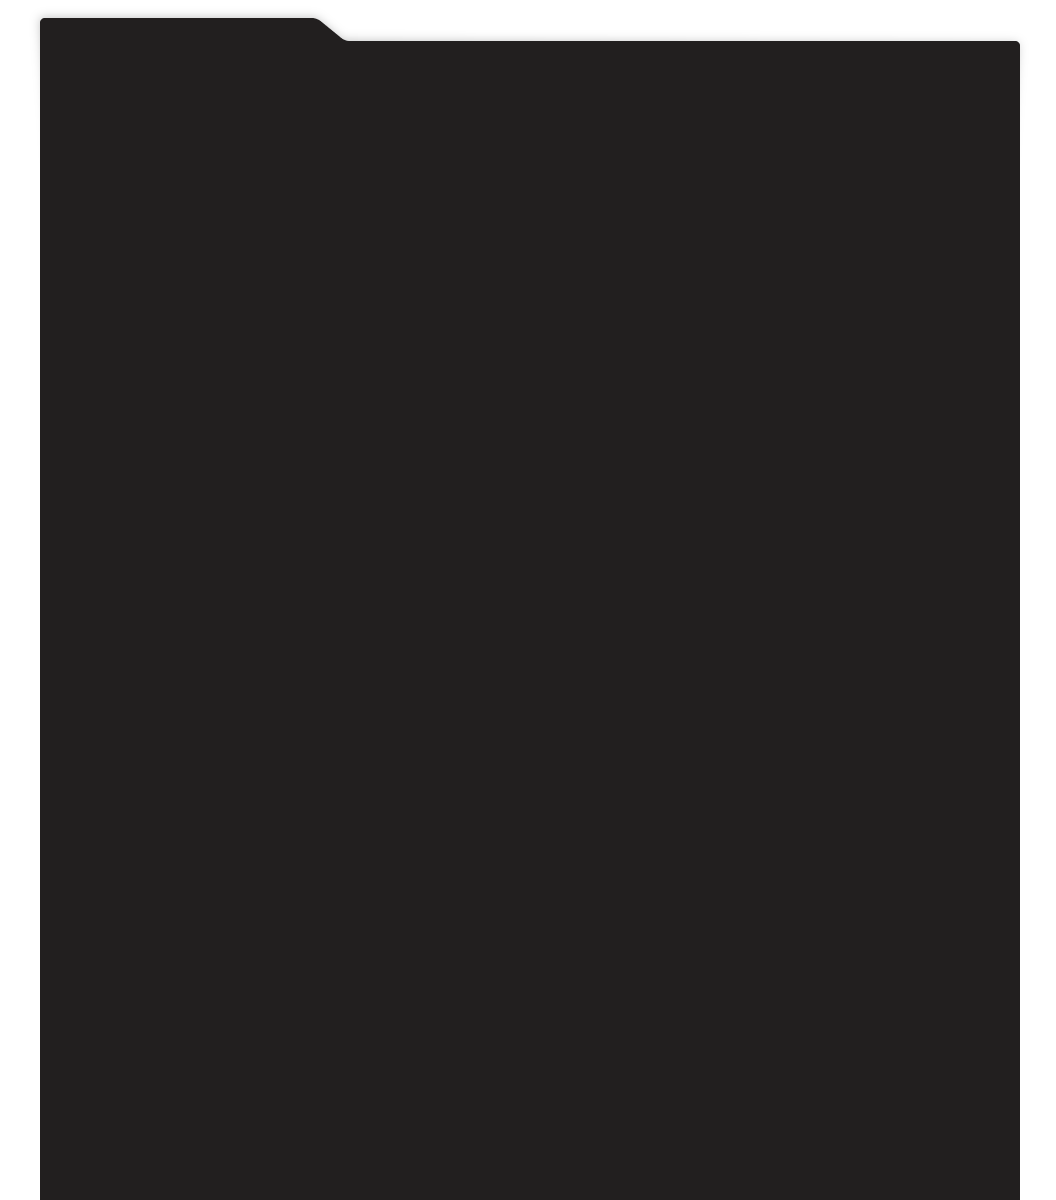
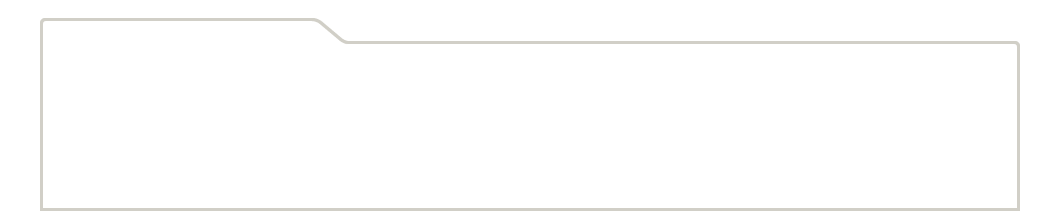
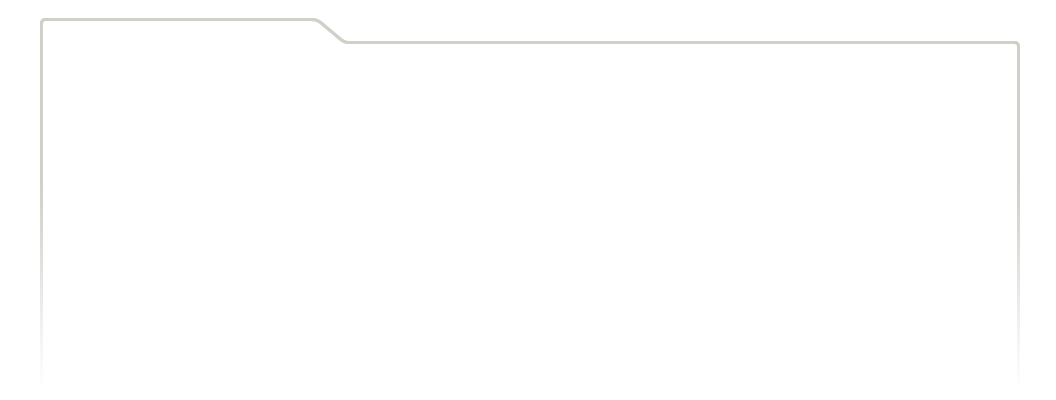
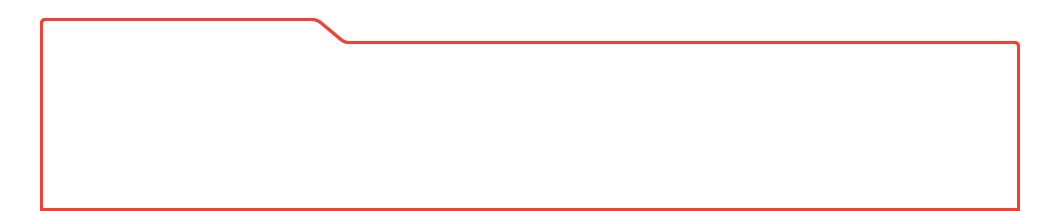
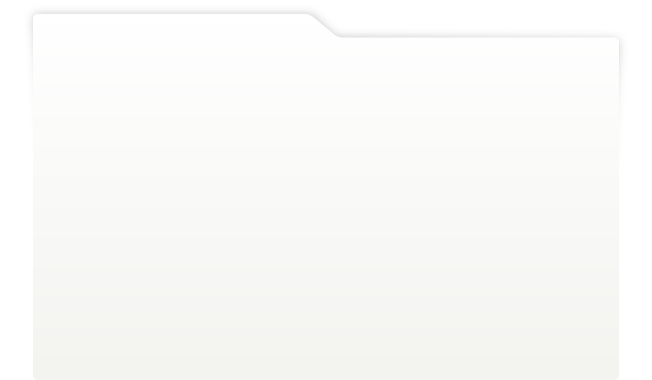
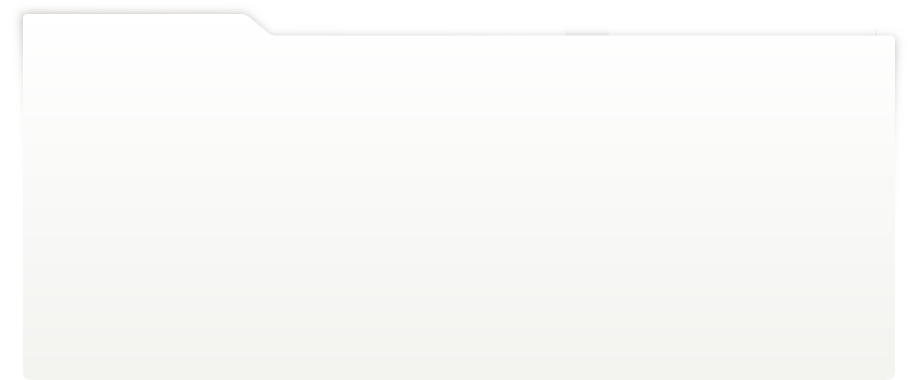
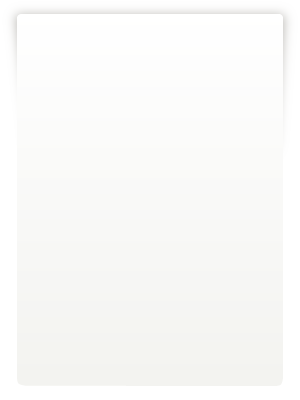
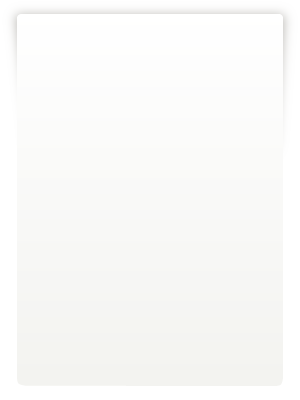
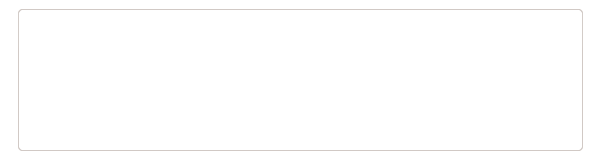
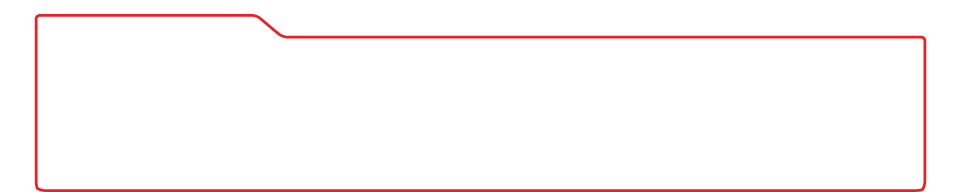
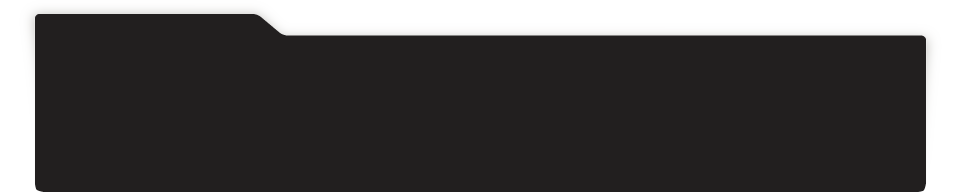
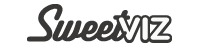
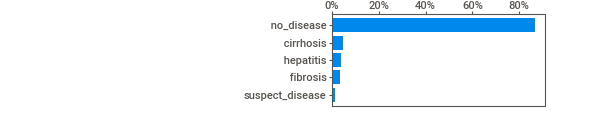
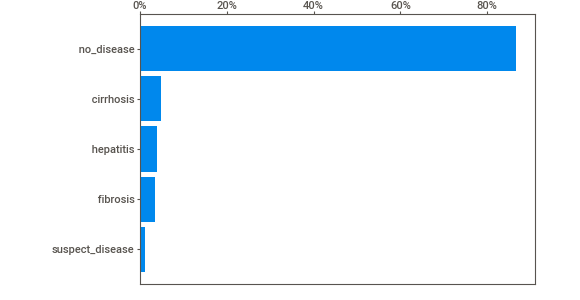
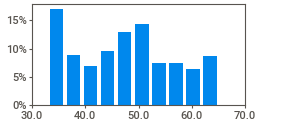
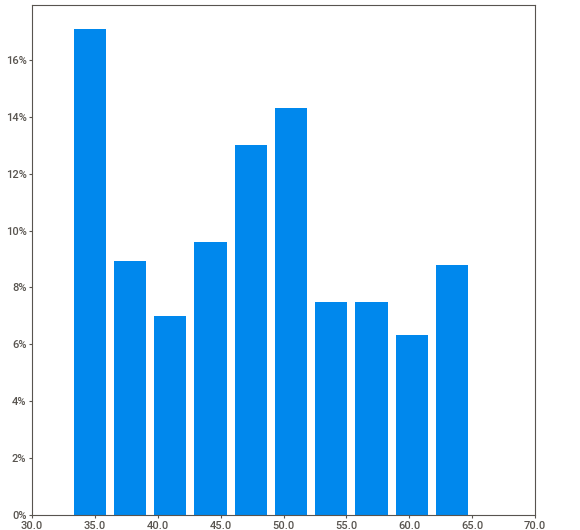
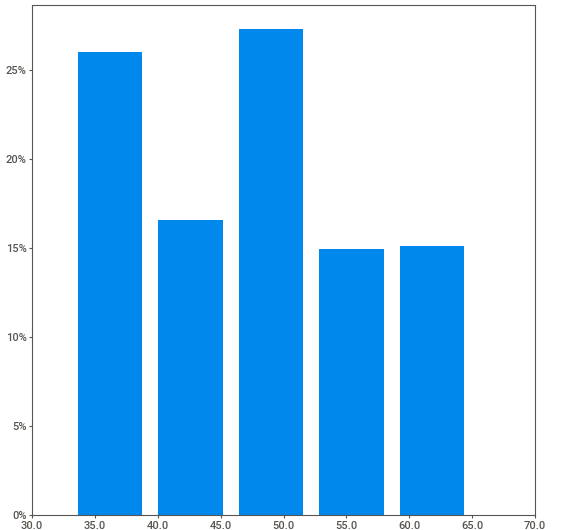
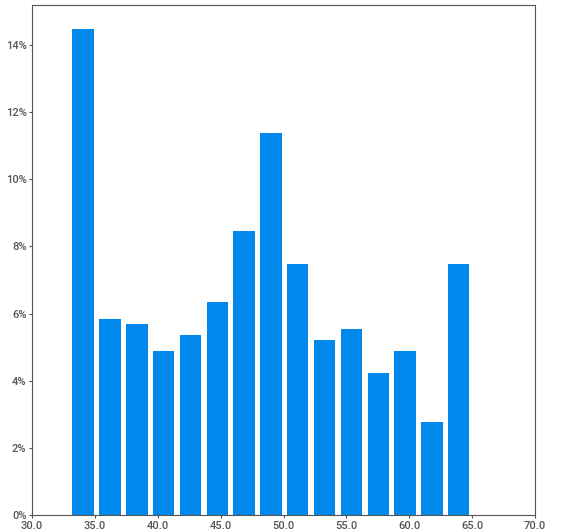
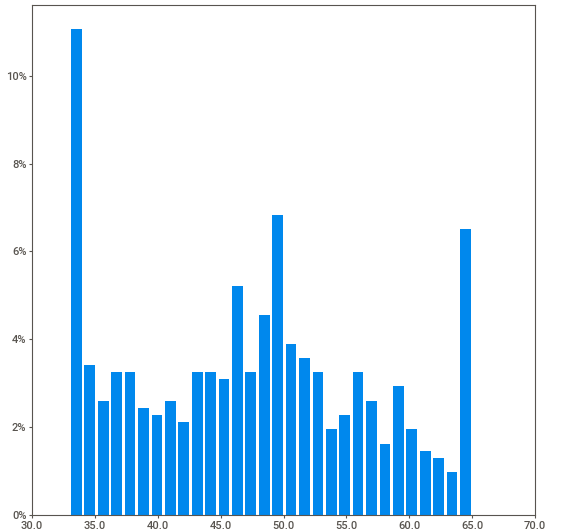
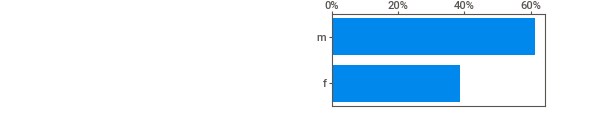
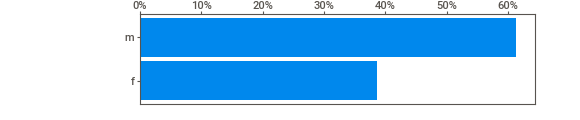
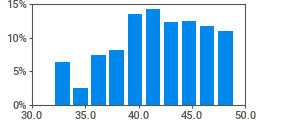
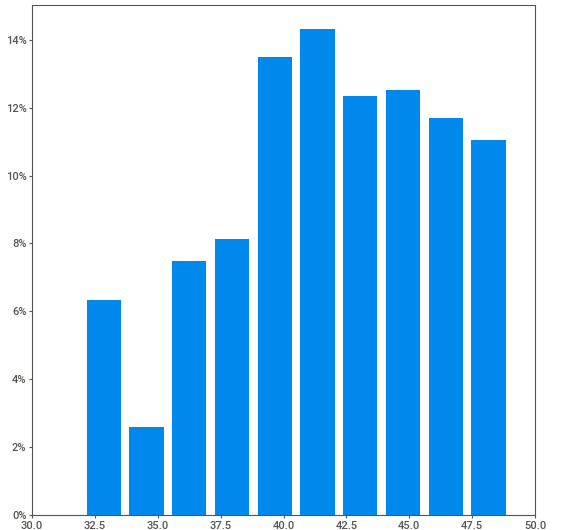
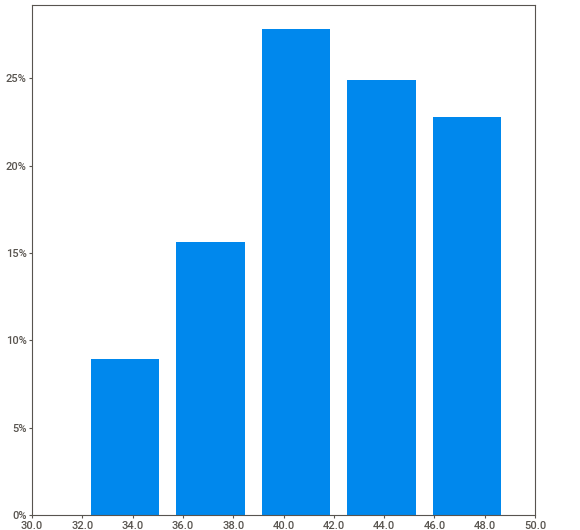
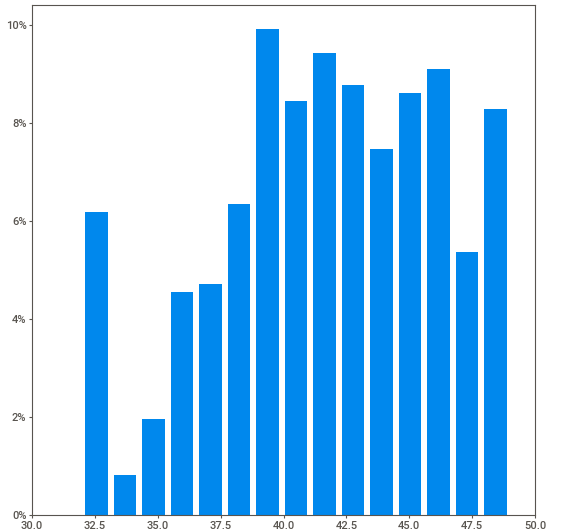
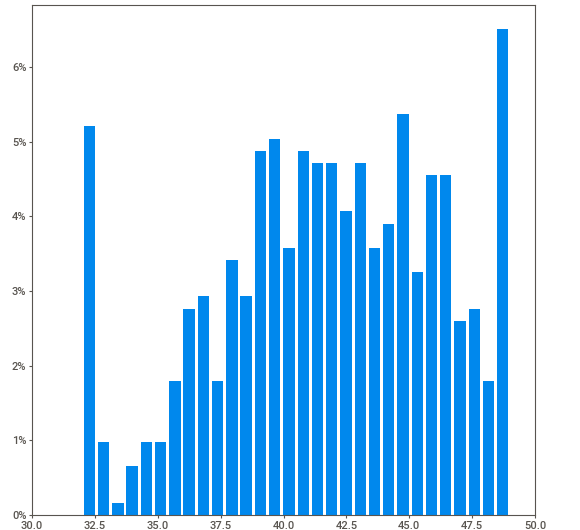
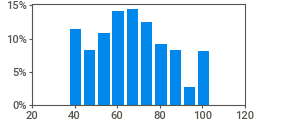
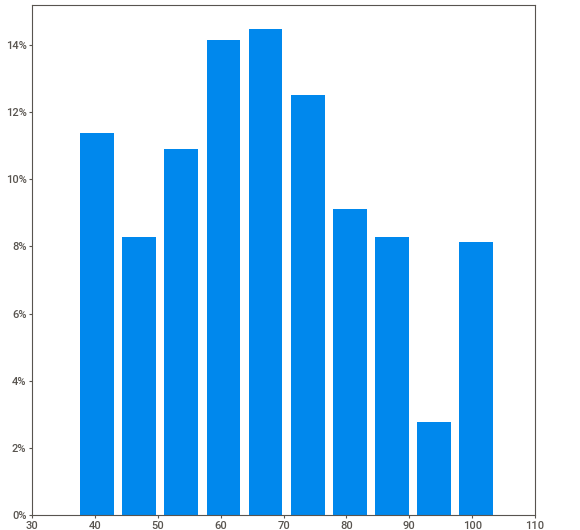
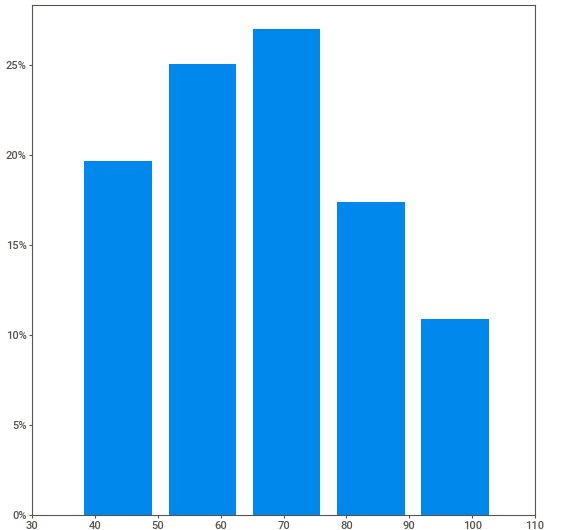
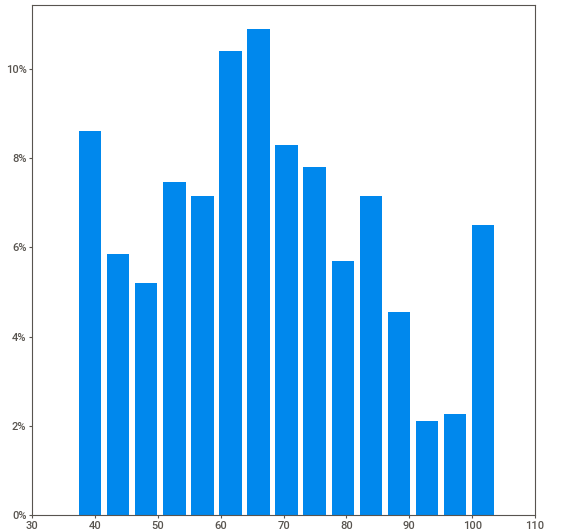
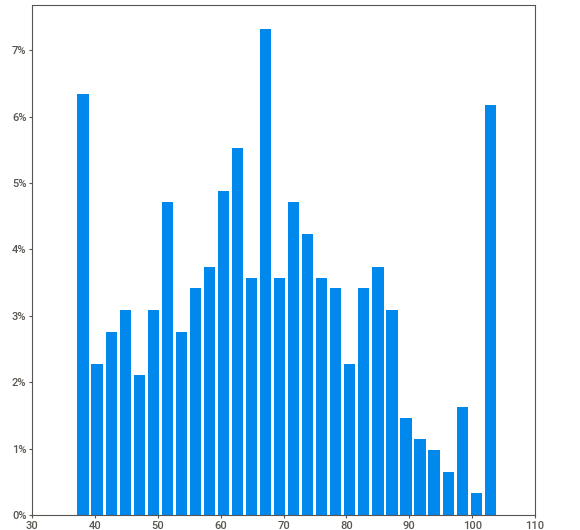
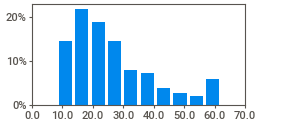
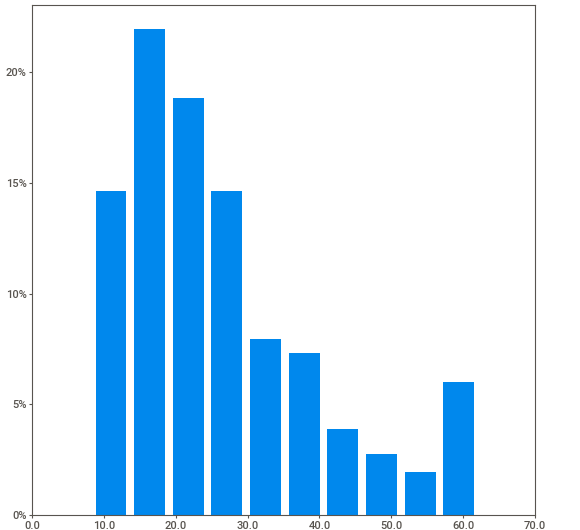
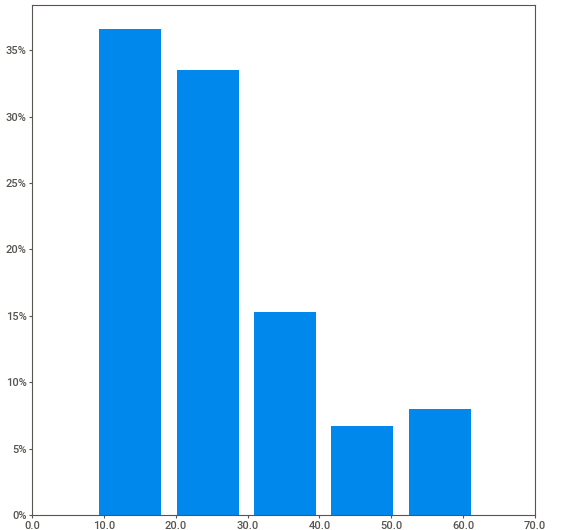
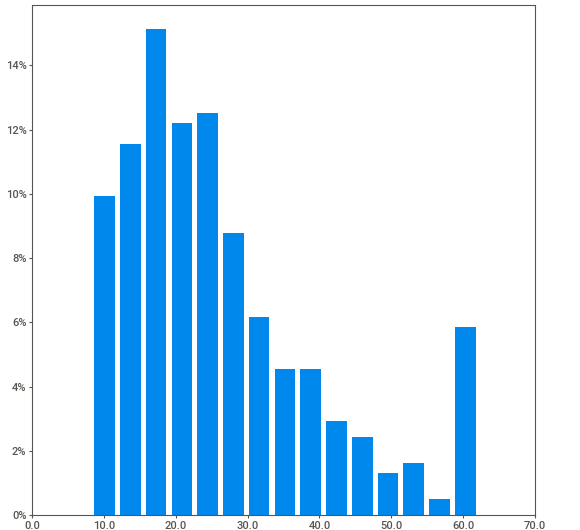
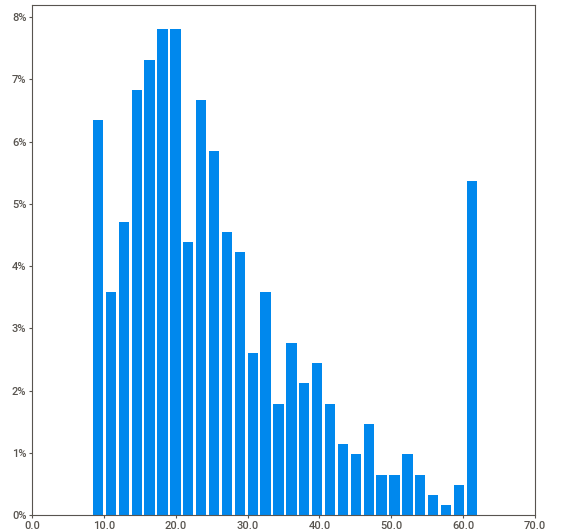
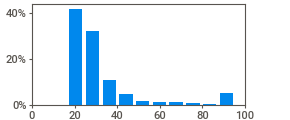
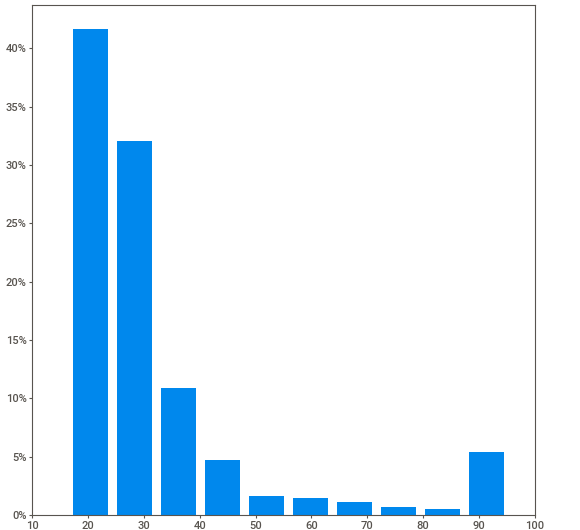
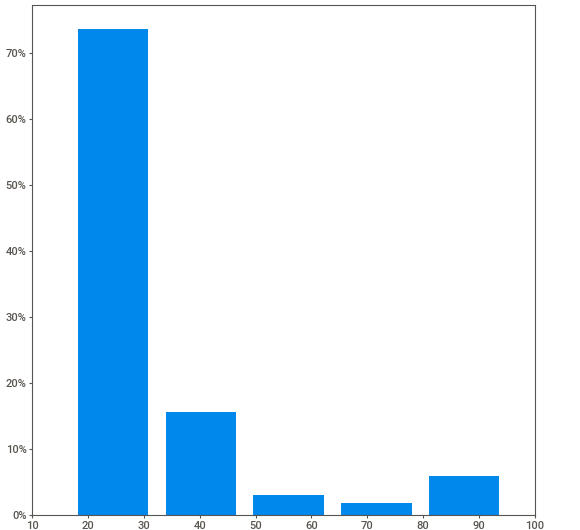
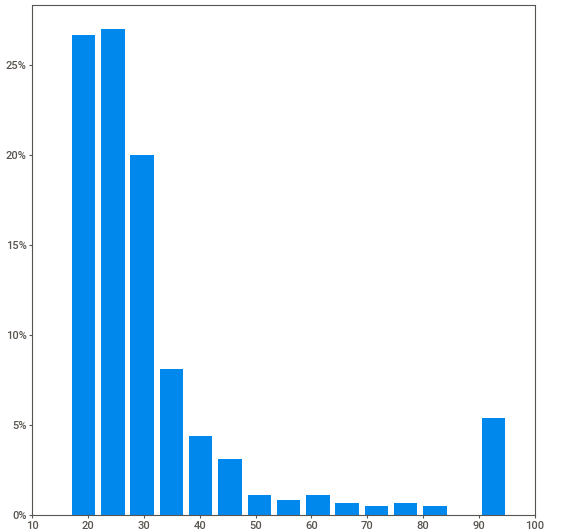
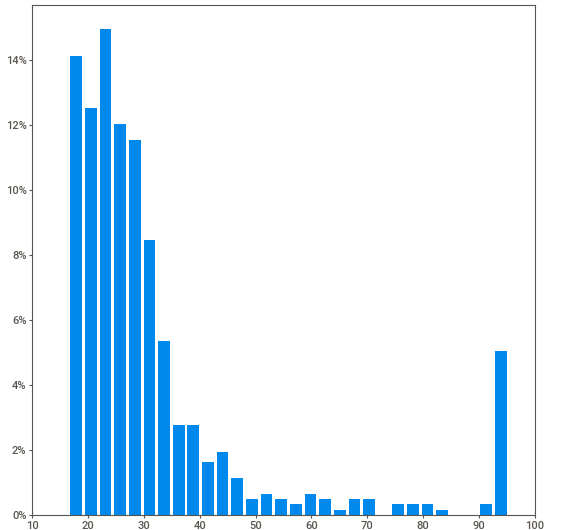
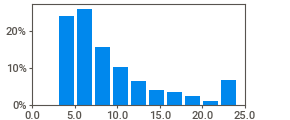
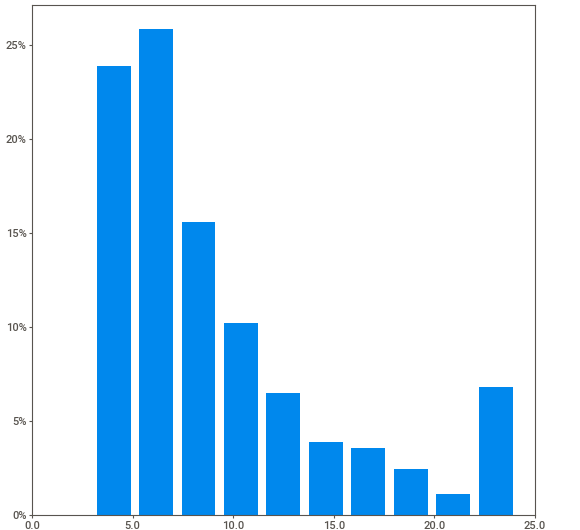
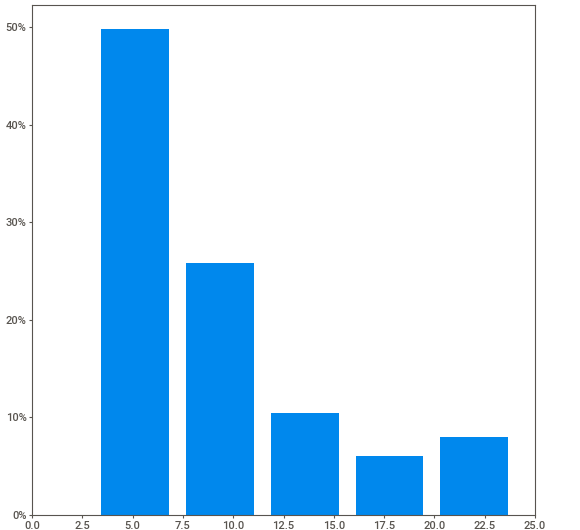
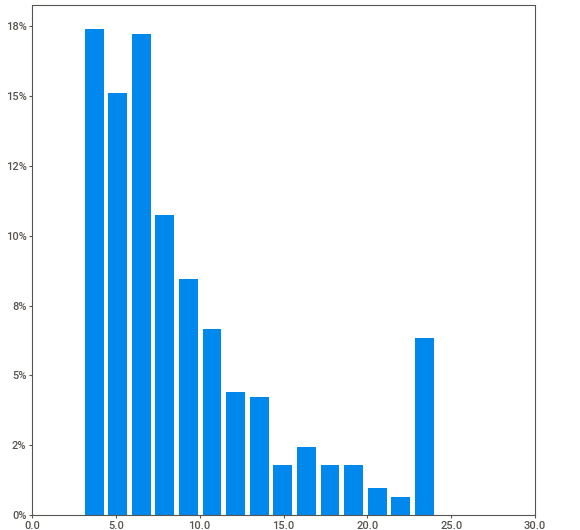
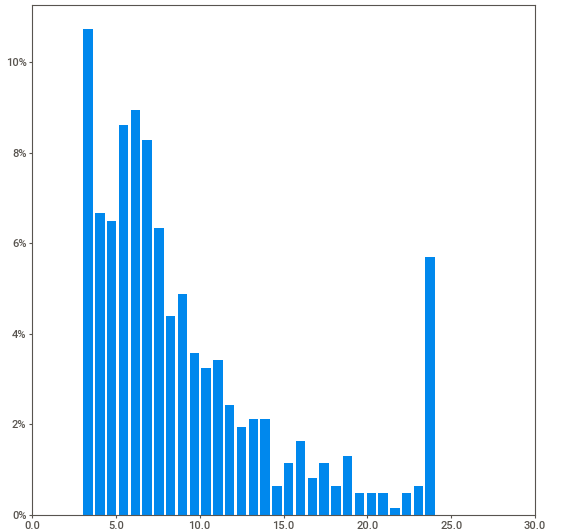
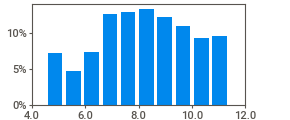
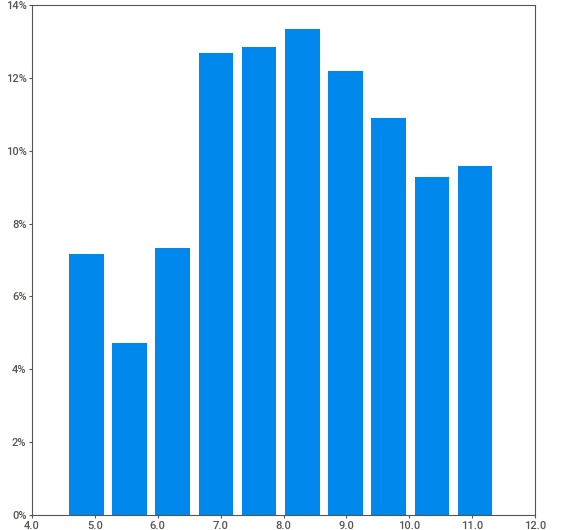
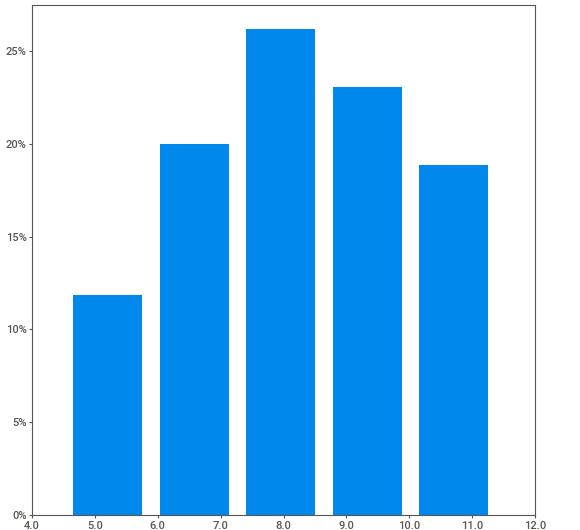
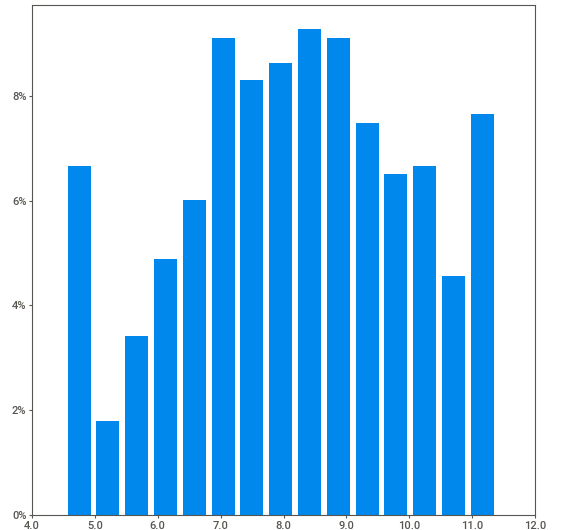
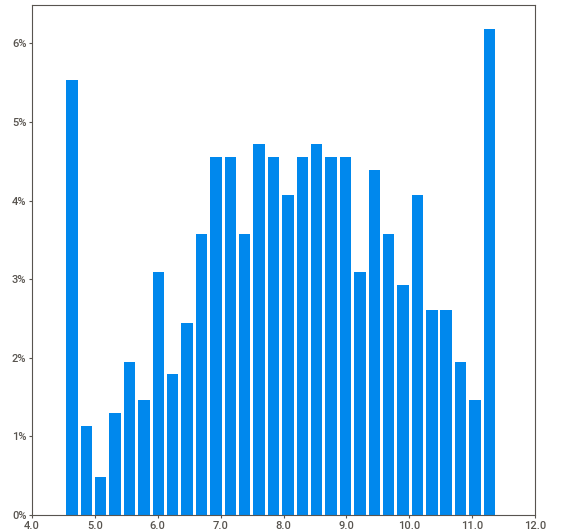
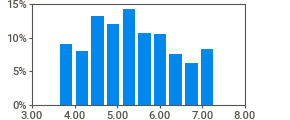
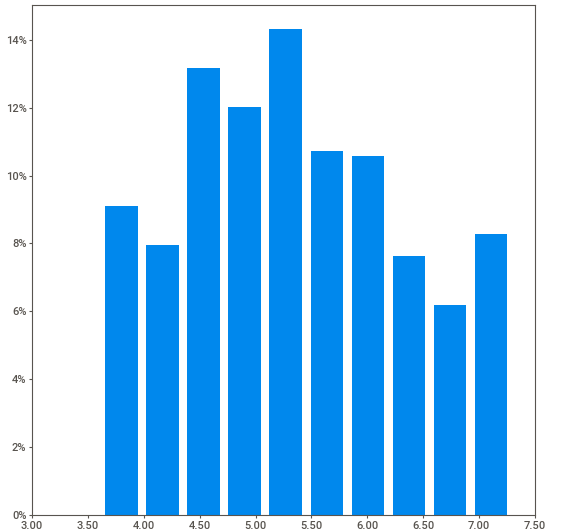
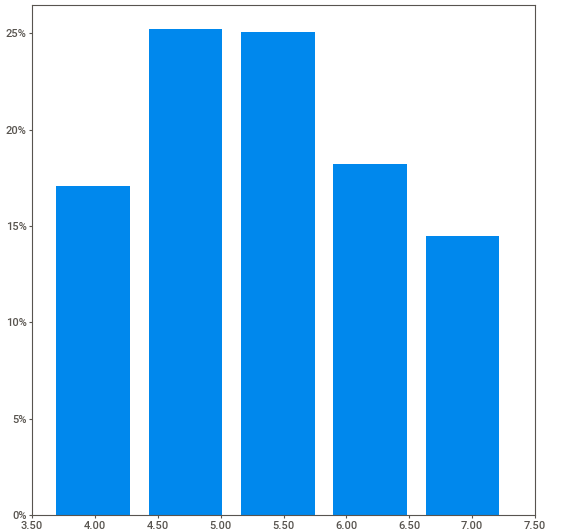
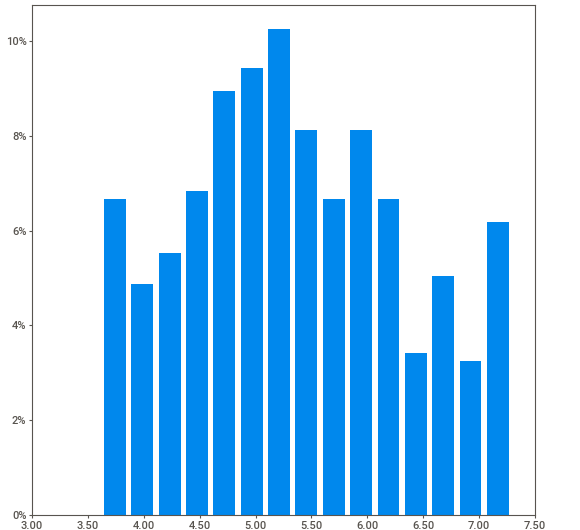
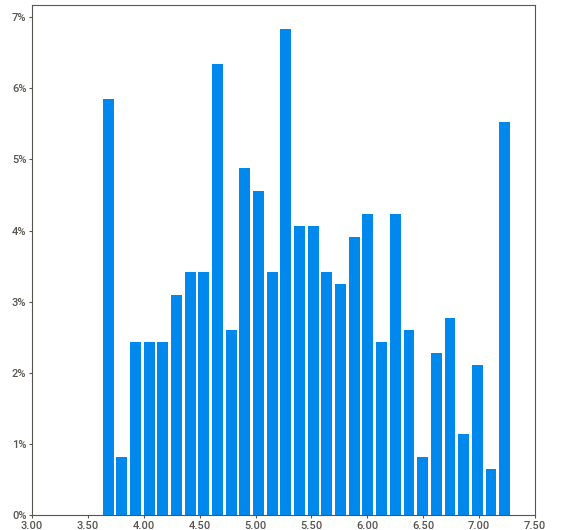
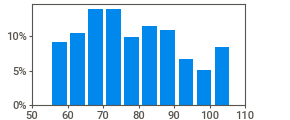
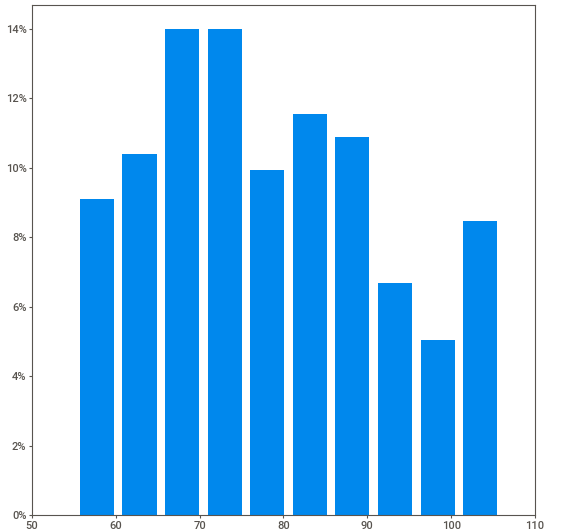
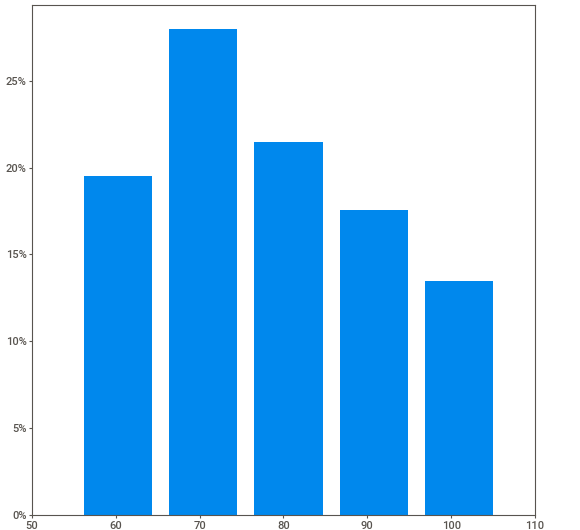
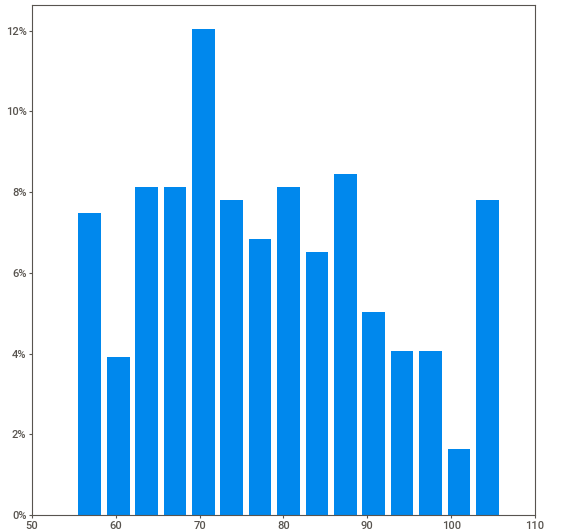
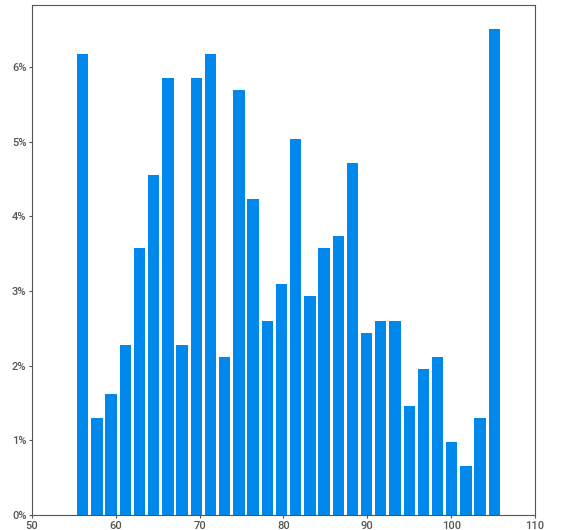
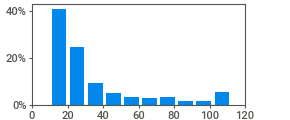
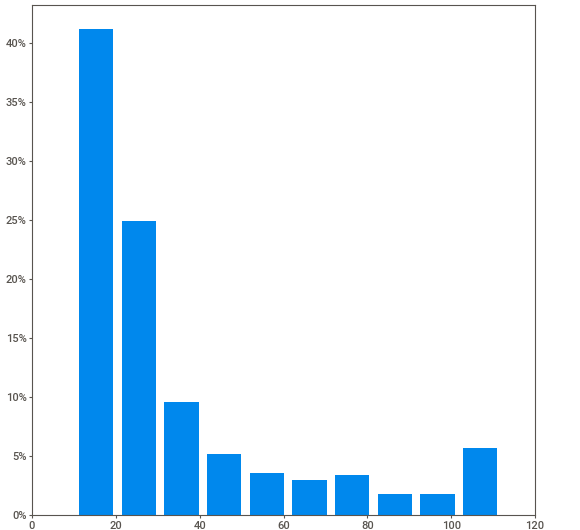
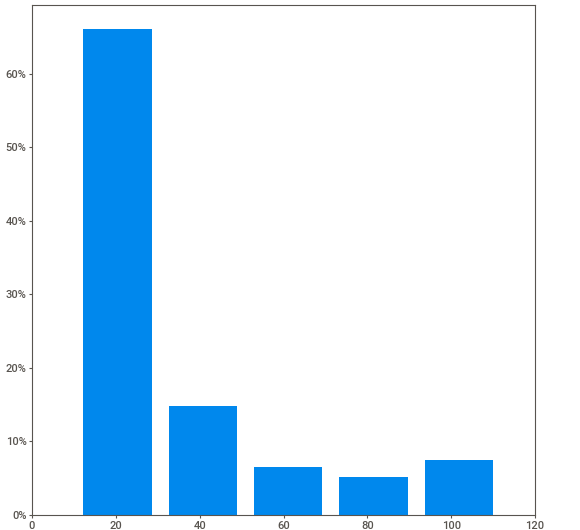
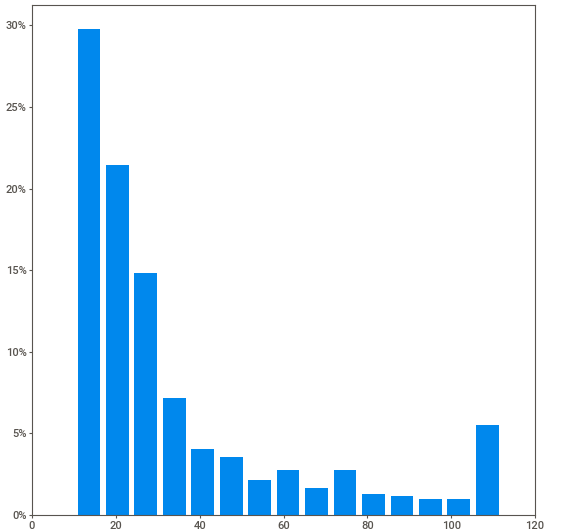
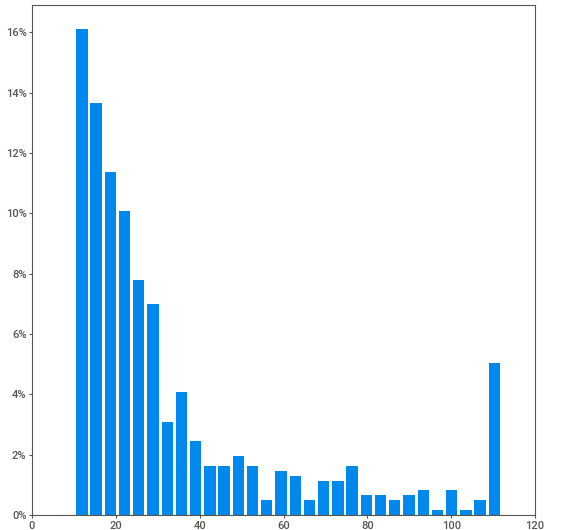
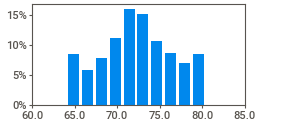
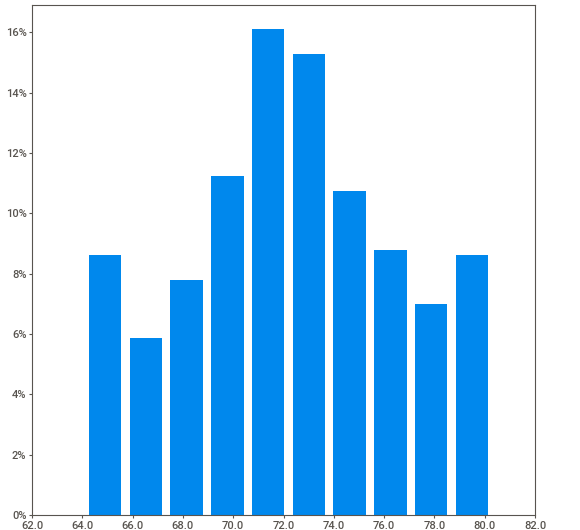
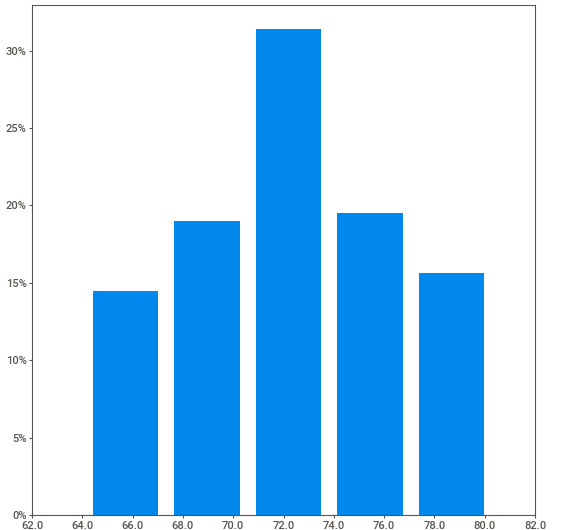
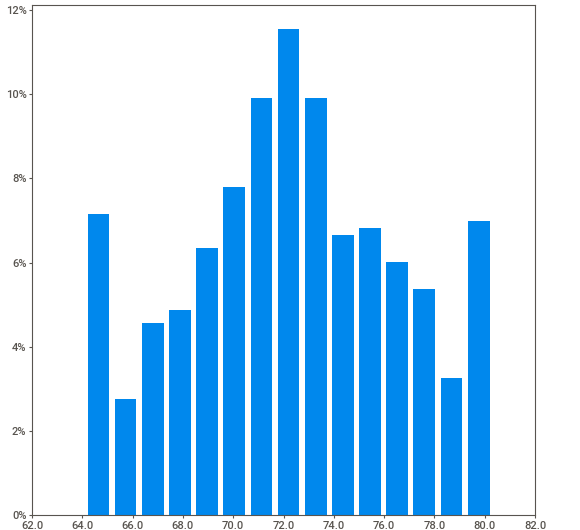
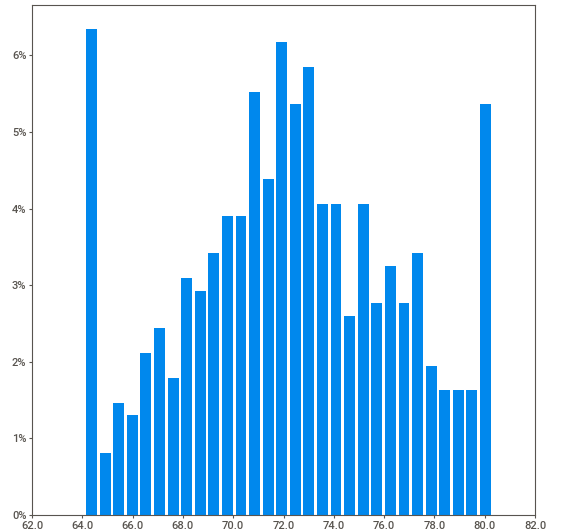
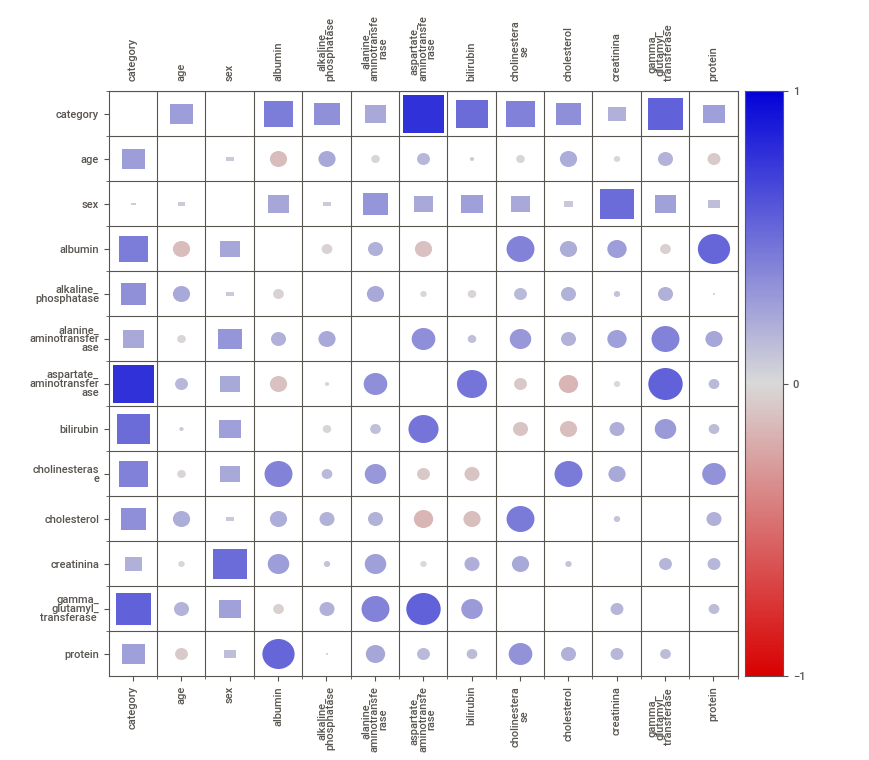
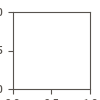

In [35]:
report.show_notebook()

In [36]:
report.show_html('sweetviz_report.html')

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Feature Engineering  

In [37]:
liver_data['category'].unique()

array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

In [38]:
liver_data['category'].value_counts()

 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: category, dtype: int64

In [39]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [40]:
label_encoder = preprocessing.LabelEncoder()
liver_data['category']= label_encoder.fit_transform(liver_data['category']) 
liver_data 

category  age sex  albumin  alkaline_phosphatase  \
0           3   33   m     38.5                  52.5   
1           3   33   m     38.5                  70.3   
2           3   33   m     46.9                  74.7   
3           3   33   m     43.2                  52.0   
4           3   33   m     39.2                  74.1   
..        ...  ...  ..      ...                   ...   
610         0   62   f     32.0                 104.0   
611         0   64   f     32.0                 102.8   
612         0   64   f     32.0                  87.3   
613         0   46   f     33.0                  66.2   
614         0   59   f     36.0                  66.2   

     alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                         8.3                        22.1        7.5   
1                        18.0                        24.7        3.9   
2                        36.2                        52.6        6.1   
3                        30.6                        22.6       18.9   
4                        32.6                        24.8        9.6   
..                        ...                         ...        ...   
610                       8.3                        95.2       24.1   
611                       8.3                        44.4       20.0   
612                       8.3                        95.2       24.1   
613                      39.0                        62.0       20.0   
614                      62.1                        80.0       12.0   

     cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase   \
0              6.93         3.62       106.0                         12.1   
1             11.17         4.80        74.0                         15.6   
2              8.84         5.20        86.0                         33.2   
3              7.33         4.74        80.0                         33.8   
4              9.15         4.32        76.0                         29.9   
..              ...          ...         ...                          ...   
610            5.57         6.30        55.7                        112.0   
611            4.52         3.62        63.0                         35.9   
612            4.52         3.63        66.7                         64.2   
613            4.52         4.20        55.2                         50.0   
614            9.07         5.30        67.0                         34.0   

     protein  
0       69.0  
1       76.5  
2       79.3  
3       75.7  
4       68.7  
..       ...  
610     68.5  
611     71.3  
612     80.3  
613     71.0  
614     68.0  

[615 rows x 13 columns]

In [41]:
#liver_data['category'] = liver_data['category'].map({' no_disease': 0,'suspect_disease' : 0, ' hepatitis': 1,' fibrosis':1, ' cirrhosis':1 })

liver_data['sex'] = liver_data['sex'].map({'m': 1, 'f':0})

In [42]:
liver_data['category'].value_counts()

3    533
0     30
2     24
1     21
4      7
Name: category, dtype: int64

In [43]:
col_names = list(liver_data.columns)
col_names

['category',
 'age',
 'sex',
 'albumin',
 'alkaline_phosphatase',
 'alanine_aminotransferase',
 'aspartate_aminotransferase',
 'bilirubin',
 'cholinesterase',
 'cholesterol',
 'creatinina',
 'gamma_glutamyl_transferase ',
 'protein']

In [44]:
X=liver_data.drop(columns='category', axis=1)
Y= liver_data['category']

In [45]:
X

age sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0     33   1     38.5                  52.5                       8.3   
1     33   1     38.5                  70.3                      18.0   
2     33   1     46.9                  74.7                      36.2   
3     33   1     43.2                  52.0                      30.6   
4     33   1     39.2                  74.1                      32.6   
..   ...  ..      ...                   ...                       ...   
610   62   0     32.0                 104.0                       8.3   
611   64   0     32.0                 102.8                       8.3   
612   64   0     32.0                  87.3                       8.3   
613   46   0     33.0                  66.2                      39.0   
614   59   0     36.0                  66.2                      62.1   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                          22.1        7.5            6.93         3.62   
1                          24.7        3.9           11.17         4.80   
2                          52.6        6.1            8.84         5.20   
3                          22.6       18.9            7.33         4.74   
4                          24.8        9.6            9.15         4.32   
..                          ...        ...             ...          ...   
610                        95.2       24.1            5.57         6.30   
611                        44.4       20.0            4.52         3.62   
612                        95.2       24.1            4.52         3.63   
613                        62.0       20.0            4.52         4.20   
614                        80.0       12.0            9.07         5.30   

     creatinina  gamma_glutamyl_transferase   protein  
0         106.0                         12.1     69.0  
1          74.0                         15.6     76.5  
2          86.0                         33.2     79.3  
3          80.0                         33.8     75.7  
4          76.0                         29.9     68.7  
..          ...                          ...      ...  
610        55.7                        112.0     68.5  
611        63.0                         35.9     71.3  
612        66.7                         64.2     80.3  
613        55.2                         50.0     71.0  
614        67.0                         34.0     68.0  

[615 rows x 12 columns]

In [46]:
Y

0      3
1      3
2      3
3      3
4      3
      ..
610    0
611    0
612    0
613    0
614    0
Name: category, Length: 615, dtype: int32

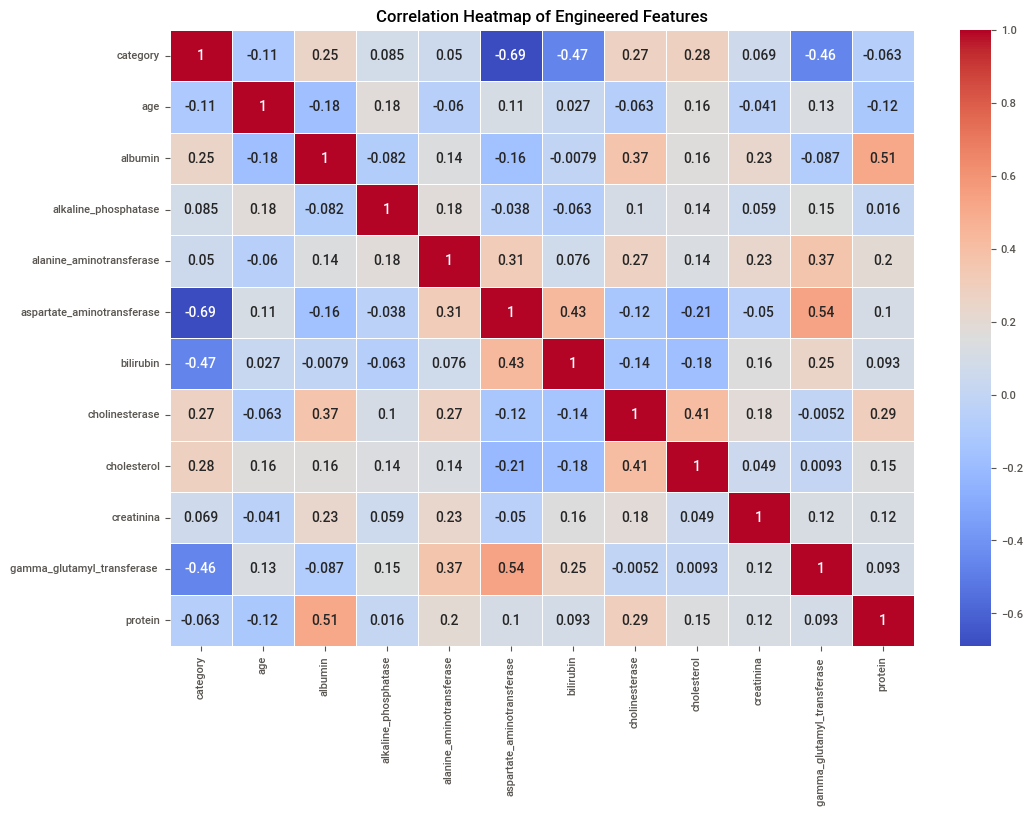

In [47]:
correlation_matrix = liver_data.corr()

# 2. Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Engineered Features')
plt.show()

<Axes: >

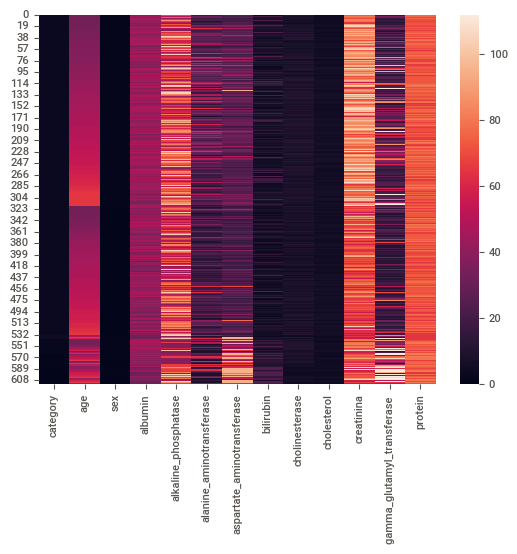

In [48]:
sns.heatmap(liver_data)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)



In [50]:
print(X.shape, X_train.shape, X_test.shape)

(615, 12) (492, 12) (123, 12)


# Data Balancing

In [51]:
!pip install -U imbalanced-learn
!pip install -U scikit-learn
from imblearn.over_sampling import SMOTE 
from collections import Counter 

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-le

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anike\\anaconda3\\Lib\\site-packages\\sklearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [52]:
sm= SMOTE(random_state=0,k_neighbors=3)
X_train_smote,Y_train_smote=sm.fit_resample(X_train,Y_train) 

In [53]:
print("Before smote:",Counter(Y_train)) 
print("After smote:",Counter(Y_train_smote))

Before smote: Counter({3: 426, 0: 24, 2: 19, 1: 17, 4: 6})
After smote: Counter({3: 426, 2: 426, 0: 426, 1: 426, 4: 426})


<Axes: >

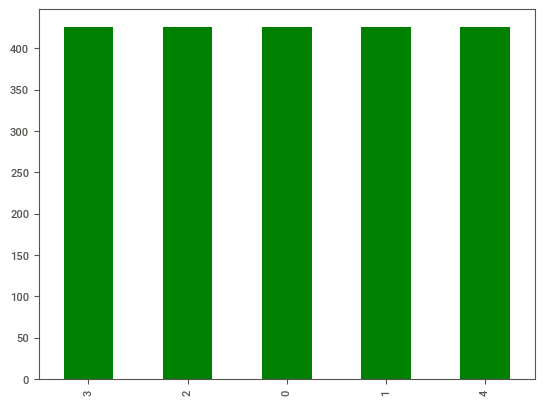

In [54]:
Y_train_smote.value_counts().plot.bar(color='green')

In [55]:
X_train_smote 

age  sex    albumin  alkaline_phosphatase  alanine_aminotransferase  \
0      43    1  37.000000             82.000000                 25.300000   
1      34    1  41.800000             75.800000                 30.900000   
2      63    0  36.100000             67.600000                 13.800000   
3      62    1  42.100000             51.400000                 11.800000   
4      65    1  39.000000             87.900000                 26.100000   
...   ...  ...        ...                   ...                       ...   
2125   55  NaN  46.740617            104.000000                 62.100000   
2126   60    1  38.225906             92.138439                 38.792032   
2127   62    1  32.000000             86.444984                 26.027379   
2128   54  NaN  32.000000            104.000000                 56.527280   
2129   53    1  42.953482            104.000000                 58.435289   

      aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                      26.200000   5.400000        8.420000     4.960000   
1                      35.500000   6.100000        9.970000     5.940000   
2                      16.600000   5.800000        9.440000     6.880000   
3                      21.800000   3.000000        5.700000     5.250000   
4                      32.100000  12.200000       10.300000     6.310000   
...                          ...        ...             ...          ...   
2125                   95.200000   3.142588       11.168440     7.196038   
2126                   64.241325   4.601311        7.546854     5.113403   
2127                   40.713940   5.602201        4.862323     3.819266   
2128                   64.571641   6.036012        4.980085     4.948957   
2129                   75.058293   3.539764        9.438328     6.710464   

      creatinina  gamma_glutamyl_transferase     protein  
0      79.000000                    15.900000  68.400000  
1      89.000000                    48.500000  71.300000  
2      66.000000                    22.400000  65.000000  
3      80.000000                    12.900000  72.000000  
4      90.000000                    99.700000  69.800000  
...          ...                          ...        ...  
2125   75.239531                    73.077064  77.780834  
2126   63.663976                    95.560354  69.878291  
2127   55.200000                   108.454773  64.100000  
2128   55.200000                    99.472180  64.100000  
2129   70.091008                    74.838582  74.265977  

[2130 rows x 12 columns]

In [56]:
Y_train_smote

0       3
1       3
2       3
3       3
4       3
       ..
2125    4
2126    4
2127    4
2128    4
2129    4
Name: category, Length: 2130, dtype: int32

In [57]:
trained_smote_data = pd.concat([X_train_smote,Y_train_smote], axis=1)
trained_smote_data.head() 

age sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0   43   1     37.0                  82.0                      25.3   
1   34   1     41.8                  75.8                      30.9   
2   63   0     36.1                  67.6                      13.8   
3   62   1     42.1                  51.4                      11.8   
4   65   1     39.0                  87.9                      26.1   

   aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                        26.2        5.4            8.42         4.96   
1                        35.5        6.1            9.97         5.94   
2                        16.6        5.8            9.44         6.88   
3                        21.8        3.0            5.70         5.25   
4                        32.1       12.2           10.30         6.31   

   creatinina  gamma_glutamyl_transferase   protein  category  
0        79.0                         15.9     68.4         3  
1        89.0                         48.5     71.3         3  
2        66.0                         22.4     65.0         3  
3        80.0                         12.9     72.0         3  
4        90.0                         99.7     69.8         3

In [58]:
test_data = pd.concat([X_test,Y_test],axis=1)
test_data.head()

age sex  albumin  alkaline_phosphatase  alanine_aminotransferase  \
454   51   0     38.3                  52.9                      12.4   
567   48   1     49.0                  45.2                      19.3   
505   57   0     48.0                  56.9                       8.6   
122   43   1     42.9                  50.7                      26.4   
242   55   1     44.1                  60.0                      26.3   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
454                        16.6        3.8            7.22         5.43   
567                        69.1       24.1            7.76         4.22   
505                        20.1        4.4            8.14         6.90   
122                        22.0        6.4           10.20         4.72   
242                        25.9        5.1            7.23         7.29   

     creatinina  gamma_glutamyl_transferase   protein  category  
454        55.2                         12.7     70.2         3  
567        76.7                         28.4     72.3         1  
505        63.0                         14.8     73.1         3  
122        81.0                         15.2     71.8         3  
242        88.0                         41.6     77.7         3

In [59]:
X_TRAIN = trained_smote_data.iloc[:,0:12]
Y_TRAIN = trained_smote_data.iloc[:,12] 
X_TEST = test_data.iloc[:,0:12]
Y_TEST = test_data.iloc[:,12]    

In [60]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [61]:
print(X_train.shape,Y_train.shape)
X_test.shape,Y_test.shape

(492, 12) (492,)


((123, 12), (123,))

# Model Building  

In [62]:
def accuracy(Y_train,Y_train_pred,Y_test,Y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(Y_train,Y_train_pred))
    print('\n',confusion_matrix(Y_train,Y_train_pred))
    print('\n',accuracy_score(Y_train,Y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(Y_test,Y_test_pred))
    print('\n',confusion_matrix(Y_test,Y_test_pred))
    print('\n',accuracy_score(Y_test,Y_test_pred))  

# Logistic Regression

In [63]:
lg = LogisticRegression()
lg_model = lg.fit(X_train,Y_train)
Y_train_pred = lg_model.predict(X_train)
Y_test_pred = lg_model.predict(X_test)

In [64]:
accuracy(Y_train,Y_train_pred,Y_test,Y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.67      0.59      0.62        17
           2       0.77      0.53      0.62        19
           3       0.97      0.99      0.98       426
           4       0.67      0.67      0.67         6

    accuracy                           0.95       492
   macro avg       0.80      0.72      0.75       492
weighted avg       0.95      0.95      0.95       492


 [[ 20   2   1   1   0]
 [  0  10   2   5   0]
 [  2   2  10   5   0]
 [  0   1   0 423   2]
 [  0   0   0   2   4]]

 0.9491869918699187
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.17      0.25      0.20         4
           2       0.50      0.40      0.44         5
           3       0.99

In [65]:
Data_models = pd.DataFrame(columns = ['Model','Train_Accuracy','Test_Accuracy'])

In [66]:
lg_train =accuracy_score(Y_train,Y_train_pred)
lg_test  =accuracy_score(Y_test,Y_test_pred)


Data_models.loc[1,'Model'] = 'Logistic Regression'
Data_models.loc[1,"Train_Accuracy"] = lg_train
Data_models.loc[1,"Test_Accuracy"] = lg_test

In [67]:
def get_percentage(num):
    return "{:.2f}".format(num*100)

Data_models["Train_Accuracy"] = Data_models["Train_Accuracy"].apply(get_percentage)
Data_models["Test_Accuracy"]  = Data_models["Test_Accuracy"].apply(get_percentage)
Data_models

Model Train_Accuracy Test_Accuracy
1  Logistic Regression          94.92         91.87

In [68]:
y_pred_lg = lg.predict(X_test)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.17      0.25      0.20         4
           2       0.50      0.40      0.44         5
           3       0.99      0.98      0.99       107
           4       0.00      0.00      0.00         1

    accuracy                           0.92       123
   macro avg       0.47      0.49      0.48       123
weighted avg       0.92      0.92      0.92       123



# Naive Bayes

In [70]:
model_nb= MultinomialNB()
model_nb.fit(X_train,Y_train)
Y_train_pred = model_nb.predict(X_train)
Y_test_pred = model_nb.predict(X_test)

In [71]:
accuracy(Y_train,Y_train_pred,Y_test,Y_test_pred)


Train Accuracy

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        24
           1       0.42      0.65      0.51        17
           2       0.25      0.32      0.28        19
           3       0.97      0.90      0.93       426
           4       0.15      0.67      0.24         6

    accuracy                           0.85       492
   macro avg       0.51      0.65      0.54       492
weighted avg       0.91      0.85      0.88       492


 [[ 17   6   0   1   0]
 [  1  11   1   3   1]
 [  4   4   6   5   0]
 [  1   4  17 382  22]
 [  0   1   0   1   4]]

 0.8536585365853658
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.38      0.75      0.50         4
           2       0.20      0.20      0.20         5
           3       0.99

In [72]:
y_pred_nb = model_nb.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.38      0.75      0.50         4
           2       0.20      0.20      0.20         5
           3       0.99      0.93      0.96       107
           4       0.25      1.00      0.40         1

    accuracy                           0.89       123
   macro avg       0.56      0.74      0.59       123
weighted avg       0.93      0.89      0.91       123



# Random Forest

In [74]:
model_rf = RandomForestClassifier(max_features=400)
model_rf.fit(X_train,Y_train)
Y_train_pred = model_rf.predict(X_train)
Y_test_pred = model_rf.predict(X_test)

In [75]:
accuracy(Y_train,Y_train_pred,Y_test,Y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00       426
           4       1.00      1.00      1.00         6

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492


 [[ 24   0   0   0   0]
 [  0  17   0   0   0]
 [  0   0  19   0   0]
 [  0   0   0 426   0]
 [  0   0   0   0   6]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.44      1.00      0.62         4
           2       0.50      0.20      0.29         5
           3       0.99      0.99     

In [76]:
y_pred_rf = model_rf.predict(X_test)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.44      1.00      0.62         4
           2       0.50      0.20      0.29         5
           3       0.99      0.99      0.99       107
           4       0.00      0.00      0.00         1

    accuracy                           0.93       123
   macro avg       0.55      0.57      0.52       123
weighted avg       0.94      0.93      0.93       123



# Gradient Boost

In [78]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,Y_train)
Y_train_pred = model_gb.predict(X_train)
Y_test_pred = model_gb.predict(X_test)

In [79]:
accuracy(Y_train,Y_train_pred,Y_test,Y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00       426
           4       1.00      1.00      1.00         6

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492


 [[ 24   0   0   0   0]
 [  0  17   0   0   0]
 [  0   0  19   0   0]
 [  0   0   0 426   0]
 [  0   0   0   0   6]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.43      0.75      0.55         4
           2       0.67      0.40      0.50         5
           3       0.98      0.98     

In [80]:
y_pred_gb = model_gb.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.43      0.75      0.55         4
           2       0.67      0.40      0.50         5
           3       0.98      0.98      0.98       107
           4       0.00      0.00      0.00         1

    accuracy                           0.93       123
   macro avg       0.62      0.59      0.59       123
weighted avg       0.94      0.93      0.94       123



# SVM

In [82]:
from sklearn.svm import SVC
model_SVM = SVC(kernel='linear',C=10)
model_SVM.fit(X_train , Y_train) 

Y_train_pred = model_SVM.predict(X_train)
Y_test_pred = model_SVM.predict(X_test)

In [83]:
accuracy(Y_train,Y_train_pred,Y_test,Y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.89      1.00      0.94        17
           2       1.00      0.68      0.81        19
           3       0.99      1.00      0.99       426
           4       1.00      1.00      1.00         6

    accuracy                           0.99       492
   macro avg       0.98      0.94      0.95       492
weighted avg       0.99      0.99      0.98       492


 [[ 24   0   0   0   0]
 [  0  17   0   0   0]
 [  0   1  13   5   0]
 [  0   1   0 425   0]
 [  0   0   0   0   6]]

 0.9857723577235772
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.29      0.50      0.36         4
           2       0.50      0.20      0.29         5
           3       0.97

In [84]:
y_pred_SVM = model_SVM.predict(X_test)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.29      0.50      0.36         4
           2       0.50      0.20      0.29         5
           3       0.97      0.97      0.97       107
           4       0.00      0.00      0.00         1

    accuracy                           0.91       123
   macro avg       0.49      0.50      0.48       123
weighted avg       0.91      0.91      0.91       123



In [86]:
DataFrame = {'Model': pd.Series(['LogisticRegression','Naive Bayes','RandomForestClassifier','Gradient Boost','SVM']),
            
             "Accuracy":pd.Series([metrics.accuracy_score(Y_test,y_pred_lg),metrics.accuracy_score(Y_test,y_pred_nb),
                             metrics.accuracy_score(Y_test,y_pred_rf),metrics.accuracy_score(Y_test,y_pred_gb),
                             metrics.accuracy_score(Y_test,y_pred_SVM)])}

table1=pd.DataFrame(DataFrame) 
table1


Model  Accuracy
0      LogisticRegression  0.918699
1             Naive Bayes  0.894309
2  RandomForestClassifier  0.934959
3          Gradient Boost  0.934959
4                     SVM  0.910569